In [ ]:
import pandas as pd

df = pd.read_csv("data.csv",encoding='cp949')

df

,age,gender,high_exercise,moderate_exercise,breakfast,height,weight,walk_days,sleep_hours,stress,...,diabetes,bmi,stress_level,exercise_score,subjective_health,has_hypertension,has_diabetes,has_chronic,has_depression,good_mental_health
0,31,1,3,0,2,181.0,88.0,7,7,3,...,2,26.861207,2,10,2,0,0,0,0,1
1,29,2,0,0,4,162.0,56.0,7,7,1,...,2,21.338211,4,7,2,0,0,0,0,0
2,31,1,2,2,4,176.0,80.0,5,7,2,...,2,25.826446,3,9,2,0,0,0,0,0
3,37,1,3,1,2,170.0,65.0,7,6,4,...,2,22.491349,1,11,3,0,0,0,0,1
4,36,2,0,4,4,160.0,55.0,7,6,2,...,2,21.484375,3,11,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22901,68,2,0,0,1,160.0,54.0,7,6,2,...,2,21.093750,3,7,4,0,0,0,1,0
22902,64,1,0,0,1,150.0,56.0,7,5,2,...,2,24.888889,3,7,2,0,0,0,0,0
22903,56,2,0,0,1,150.0,60.0,0,8,4,...,2,26.666667,1,0,2,0,0,0,0,1
22904,54,1,0,3,1,177.0,89.0,5,6,2,...,2,28.408184,3,8,2,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'NanumGothic.ttf'       # 설치한 폰트 경로
fm.fontManager.addfont(font_path)   # 폰트 경로 추가

plt.rcParams['font.family'] = 'NanumGothic' # 사용 폰트 입력
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 사용

In [ ]:
df = df[df['sleep_hours'] <= 15]

/tmp/ipython-input-4012443823.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sleep_hours', y='has_chronic', data=df, ci=None)


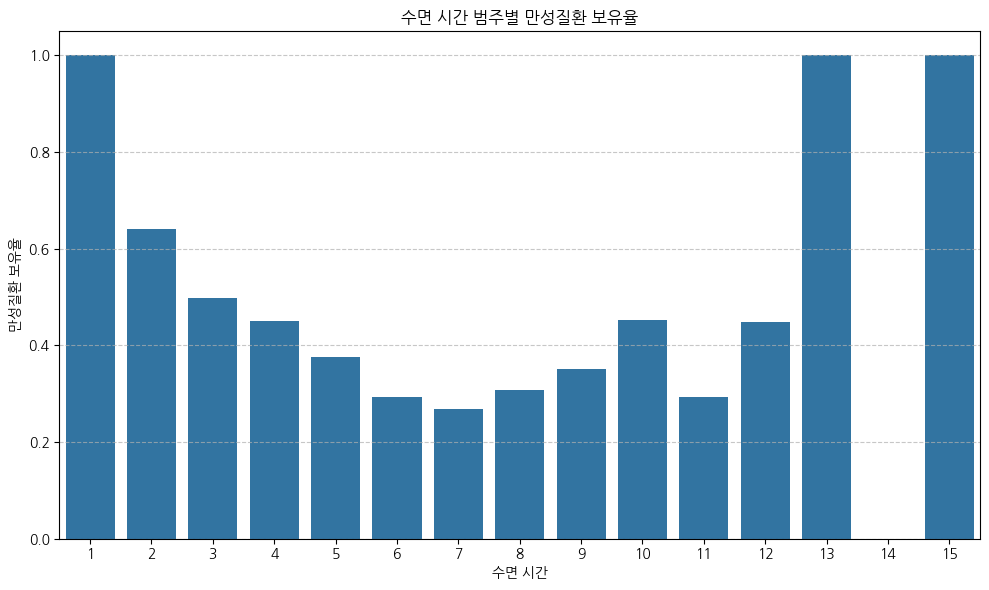

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. 수면과 만성질환(has_chronic)의 관계 분석
# 수면 시간 범주별 만성질환 보유율
plt.figure(figsize=(10, 6))
sns.barplot(x='sleep_hours', y='has_chronic', data=df, ci=None)
plt.title('수면 시간 범주별 만성질환 보유율')
plt.xlabel('수면 시간')
plt.ylabel('만성질환 보유율')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


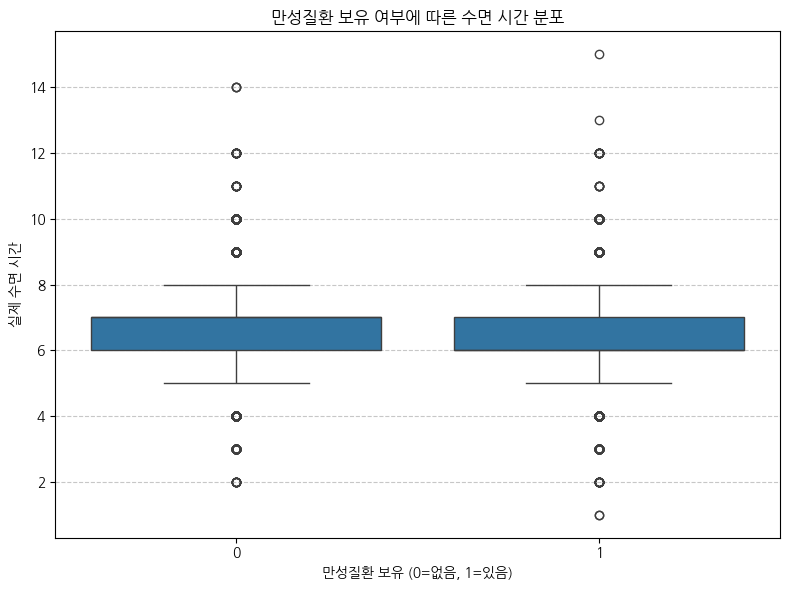

In [ ]:
# 실제 수면 시간과 만성질환 보유 여부에 따른 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(x='has_chronic', y='sleep_hours', data=df)
plt.title('만성질환 보유 여부에 따른 수면 시간 분포')
plt.xlabel('만성질환 보유 (0=없음, 1=있음)')
plt.ylabel('실제 수면 시간')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

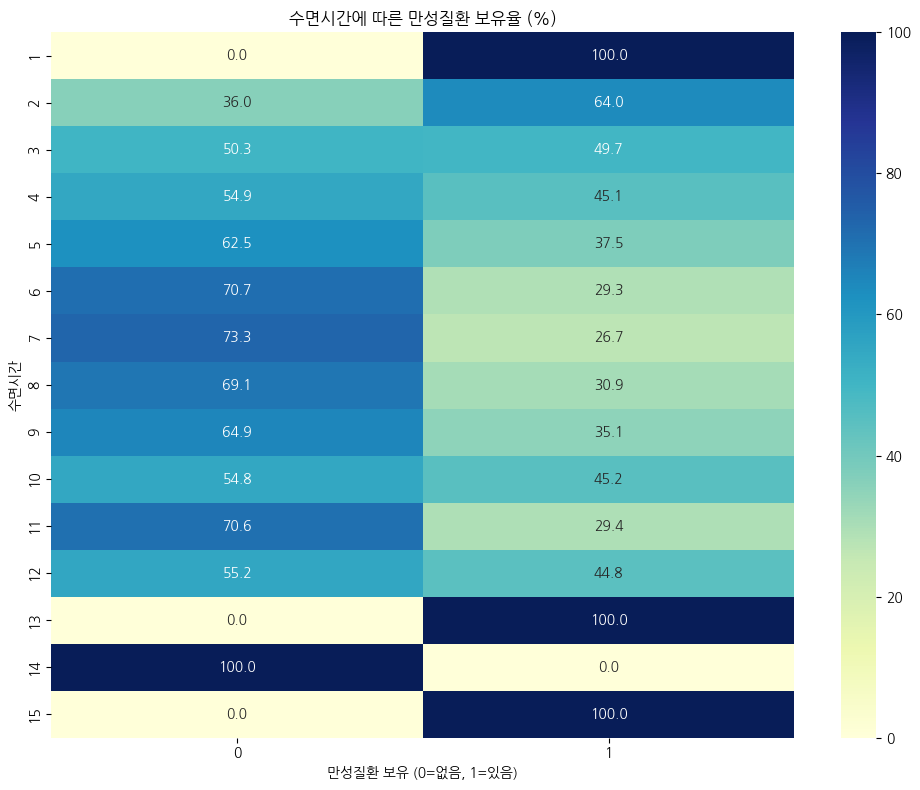

In [ ]:
# 2. 수면의 질과 만성질환 관계 시각화
# 수면의 질과 만성질환 교차표
수면시간_만성질환_교차표 = pd.crosstab(df['sleep_hours'], df['has_chronic'])
수면시간_만성질환_비율 = pd.crosstab(df['sleep_hours'], df['has_chronic'], normalize='index') * 100

# 히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(수면시간_만성질환_비율, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('수면시간에 따른 만성질환 보유율 (%)')
plt.xlabel('만성질환 보유 (0=없음, 1=있음)')
plt.ylabel('수면시간')
plt.tight_layout()
plt.show()

In [ ]:
# 1. 운동량 변수 생성 (기존에 작성했던 방식대로)
def calculate_exercise_level(row):
    high_intensity = row['high_exercise']
    moderate_intensity = row['moderate_exercise']

    # 둘 다 결측치인 경우 (즉, 둘 다 활동이 없는 경우)
    if pd.isna(high_intensity) and pd.isna(moderate_intensity):
        return 0

    # 고강도만 있는 경우 (중강도는 결측치)
    elif pd.isna(moderate_intensity):
        return high_intensity

    # 중강도만 있는 경우 (고강도는 결측치)
    elif pd.isna(high_intensity):
        return moderate_intensity

    # 둘 다 있는 경우 - 평균 계산
    else:
        return (high_intensity + moderate_intensity) / 2

# 운동량 변수 생성
df['exercise'] = df.apply(calculate_exercise_level, axis=1)
df['exercise']

,exercise
0,1.5
1,0.0
2,2.0
3,2.0
4,2.0
...,...
22901,0.0
22902,0.0
22903,0.0
22904,1.5


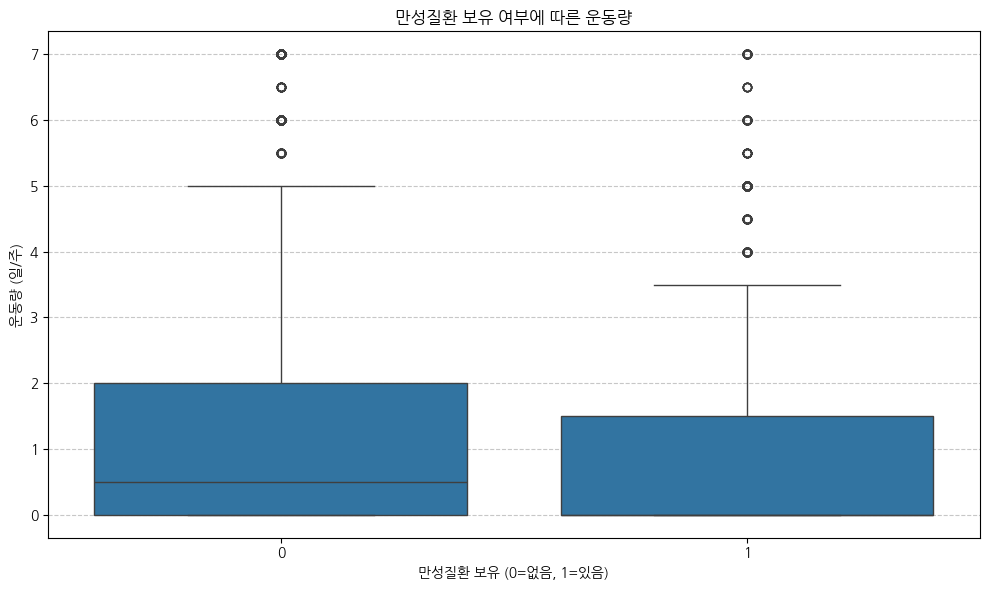

In [ ]:
# 2. 운동량과 만성질환 관계 분석
# 2.1 만성질환 유무에 따른 운동량 비교 (박스플롯)
plt.figure(figsize=(10, 6))
sns.boxplot(x='has_chronic', y='exercise', data=df)
plt.title('만성질환 보유 여부에 따른 운동량')
plt.xlabel('만성질환 보유 (0=없음, 1=있음)')
plt.ylabel('운동량 (일/주)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# 2.2 통계적 검정 (t-test)
chronic_yes = df[df['has_chronic'] == 1]['exercise'].dropna()
chronic_no = df[df['has_chronic'] == 0]['exercise'].dropna()

t_stat, p_val = stats.ttest_ind(chronic_yes, chronic_no, equal_var=False)
print(f"독립표본 t-검정 결과: t={t_stat:.4f}, p={p_val:.4f}")

if p_val < 0.05:
    print("결론: 만성질환 유무에 따라 운동량에 통계적으로 유의한 차이가 있습니다.")
else:
    print("결론: 만성질환 유무에 따라 운동량에 통계적으로 유의한 차이가 없습니다.")


독립표본 t-검정 결과: t=-19.0253, p=0.0000
결론: 만성질환 유무에 따라 운동량에 통계적으로 유의한 차이가 있습니다.


/tmp/ipython-input-336042944.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='exercise_range', y='has_chronic', data=df, ci=None)


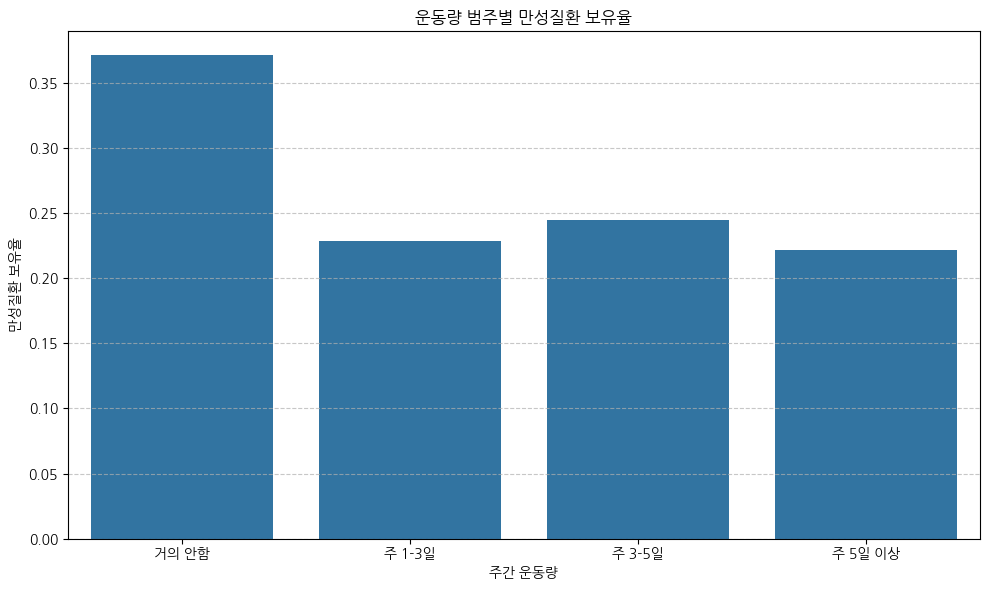

In [ ]:
# 2.3 운동량 범주화 및 만성질환 보유율 비교
# 운동량을 4개 범주로 나누기
bins = [0, 1, 3, 5, 7]
labels = ['거의 안함', '주 1-3일', '주 3-5일', '주 5일 이상']
df['exercise_range'] = pd.cut(df['exercise'], bins=bins, labels=labels, right=False)

# 범주별 만성질환 보유율
plt.figure(figsize=(10, 6))
sns.barplot(x='exercise_range', y='has_chronic', data=df, ci=None)
plt.title('운동량 범주별 만성질환 보유율')
plt.xlabel('주간 운동량')
plt.ylabel('만성질환 보유율')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

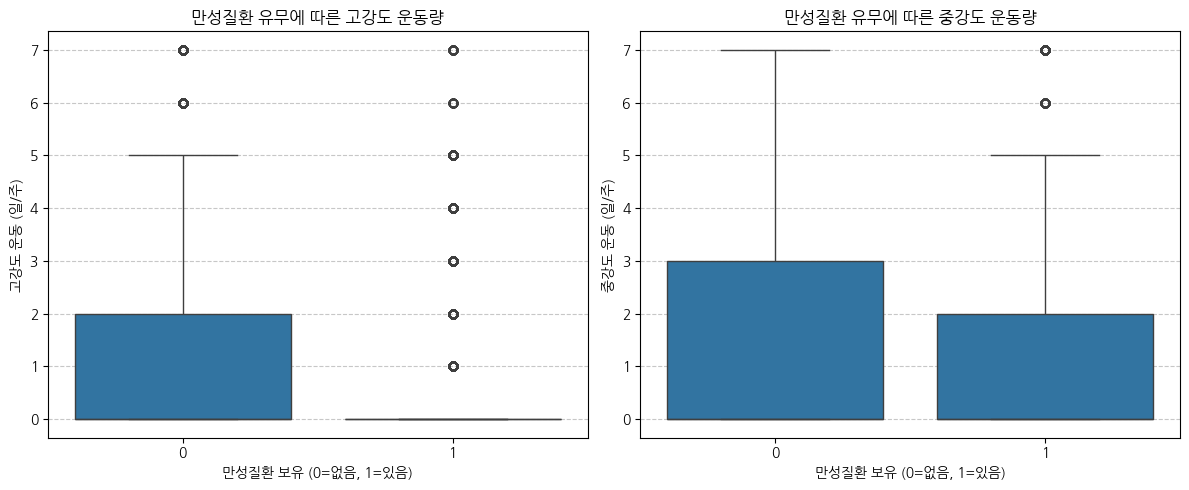

In [ ]:
# 2.4 운동 유형별 분석 (고강도 vs 중강도)
# 고강도 운동과 만성질환 관계
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='has_chronic', y='high_exercise', data=df)
plt.title('만성질환 유무에 따른 고강도 운동량')
plt.xlabel('만성질환 보유 (0=없음, 1=있음)')
plt.ylabel('고강도 운동 (일/주)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 중강도 운동과 만성질환 관계
plt.subplot(1, 2, 2)
sns.boxplot(x='has_chronic', y='moderate_exercise', data=df)
plt.title('만성질환 유무에 따른 중강도 운동량')
plt.xlabel('만성질환 보유 (0=없음, 1=있음)')
plt.ylabel('중강도 운동 (일/주)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

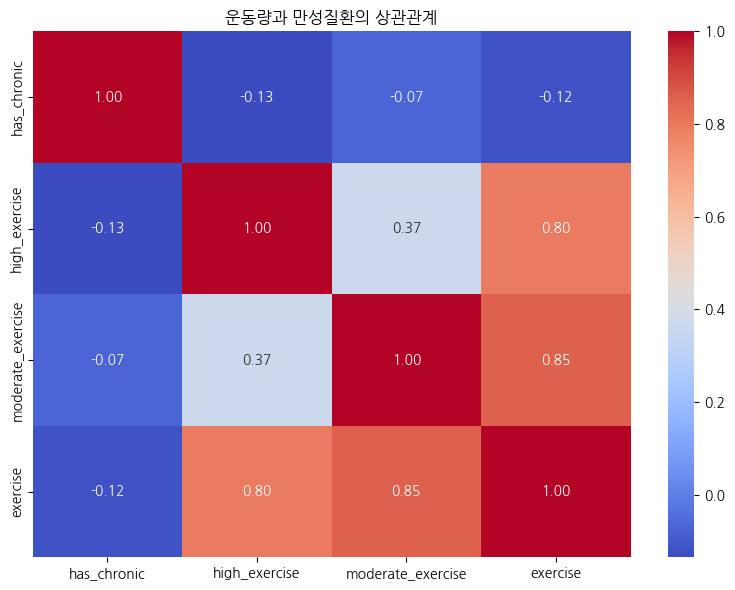

In [ ]:
# 2.5 상관관계 분석
# 고강도, 중강도 운동과 만성질환의 상관관계
corr_vars = ['has_chronic', 'high_exercise', 'moderate_exercise', 'exercise']
corr_matrix = df[corr_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('운동량과 만성질환의 상관관계')
plt.tight_layout()
plt.show()

In [ ]:
# 1. 기본 통계 분석: 연령별 만성질환 보유율
# 연령대 구분 (30대 미만, 30대부터 80대까지 10세 단위, 90대 이상)
bins = [0, 30, 40, 50, 60, 70, 80, 90, 110]
labels = ['30대 미만', '30대', '40대', '50대', '60대', '70대', '80대', '90대 이상']
df['age2'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['age2'].value_counts()

,count
age2,
60대,4483
50대,4142
30대,3346
40대,3264
70대,3059
30대 미만,2958
80대,1533
90대 이상,121


/tmp/ipython-input-298392052.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_chronic = df.groupby('age2')['has_chronic'].mean() * 100


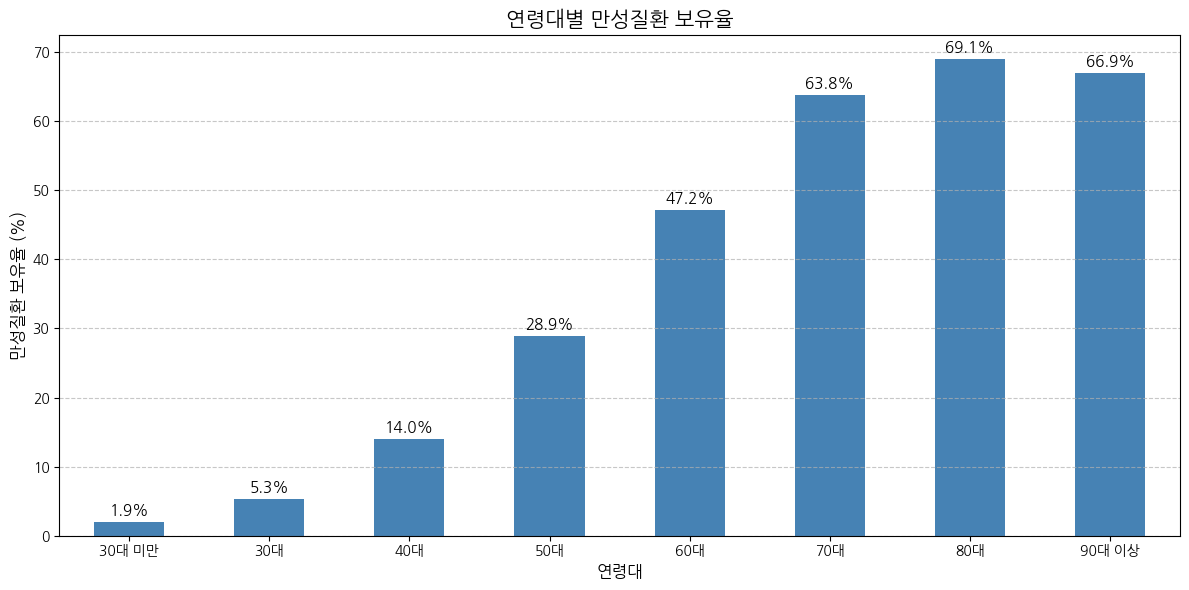

In [ ]:
# 연령대별 만성질환 보유율
age_chronic = df.groupby('age2')['has_chronic'].mean() * 100

# 시각화: 연령대별 만성질환 보유율
plt.figure(figsize=(12, 6))
age_chronic.plot(kind='bar', color='steelblue')
plt.title('연령대별 만성질환 보유율', fontsize=15)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('만성질환 보유율 (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
for i, v in enumerate(age_chronic):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

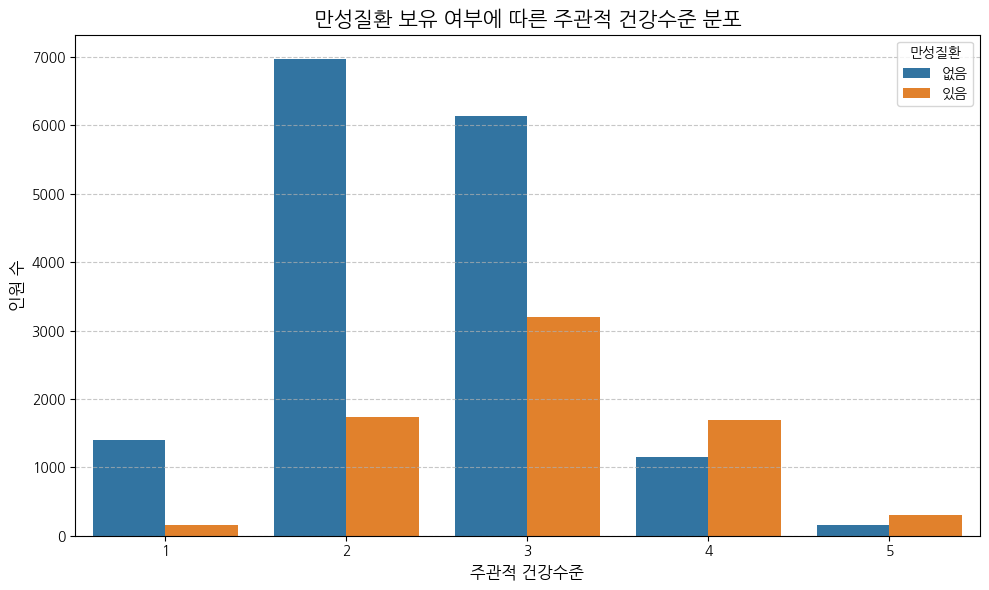

In [ ]:
# 1. 만성질환 여부에 따른 주관적 건강수준 분포 확인
plt.figure(figsize=(10, 6))
sns.countplot(x='subjective_health', hue='has_chronic', data=df)
plt.title('만성질환 보유 여부에 따른 주관적 건강수준 분포', fontsize=15)
plt.xlabel('주관적 건강수준', fontsize=12)
plt.ylabel('인원 수', fontsize=12)
plt.legend(title='만성질환', labels=['없음', '있음'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2532107889.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='has_chronic', y='subjective_health', data=df, ci=None)


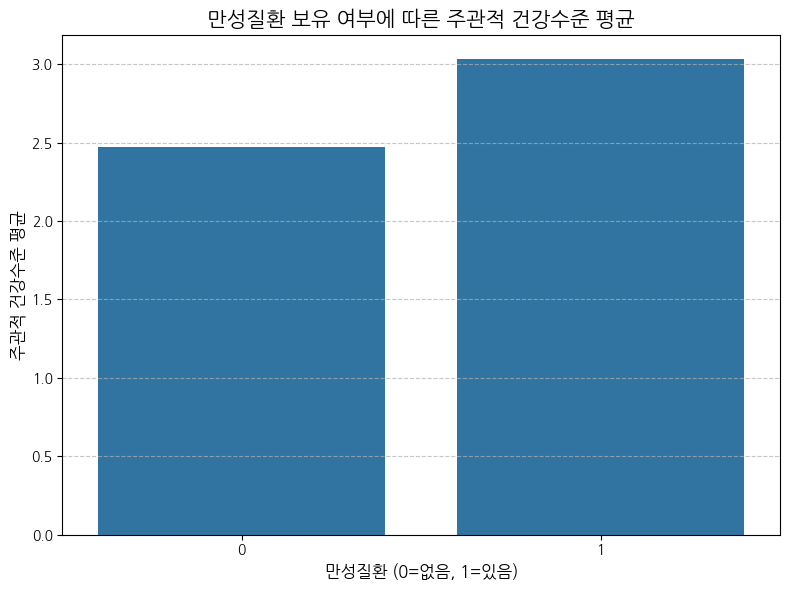

In [ ]:
# 2. 만성질환 여부에 따른 주관적 건강수준 평균 비교
plt.figure(figsize=(8, 6))
sns.barplot(x='has_chronic', y='subjective_health', data=df, ci=None)
plt.title('만성질환 보유 여부에 따른 주관적 건강수준 평균', fontsize=15)
plt.xlabel('만성질환 (0=없음, 1=있음)', fontsize=12)
plt.ylabel('주관적 건강수준 평균', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


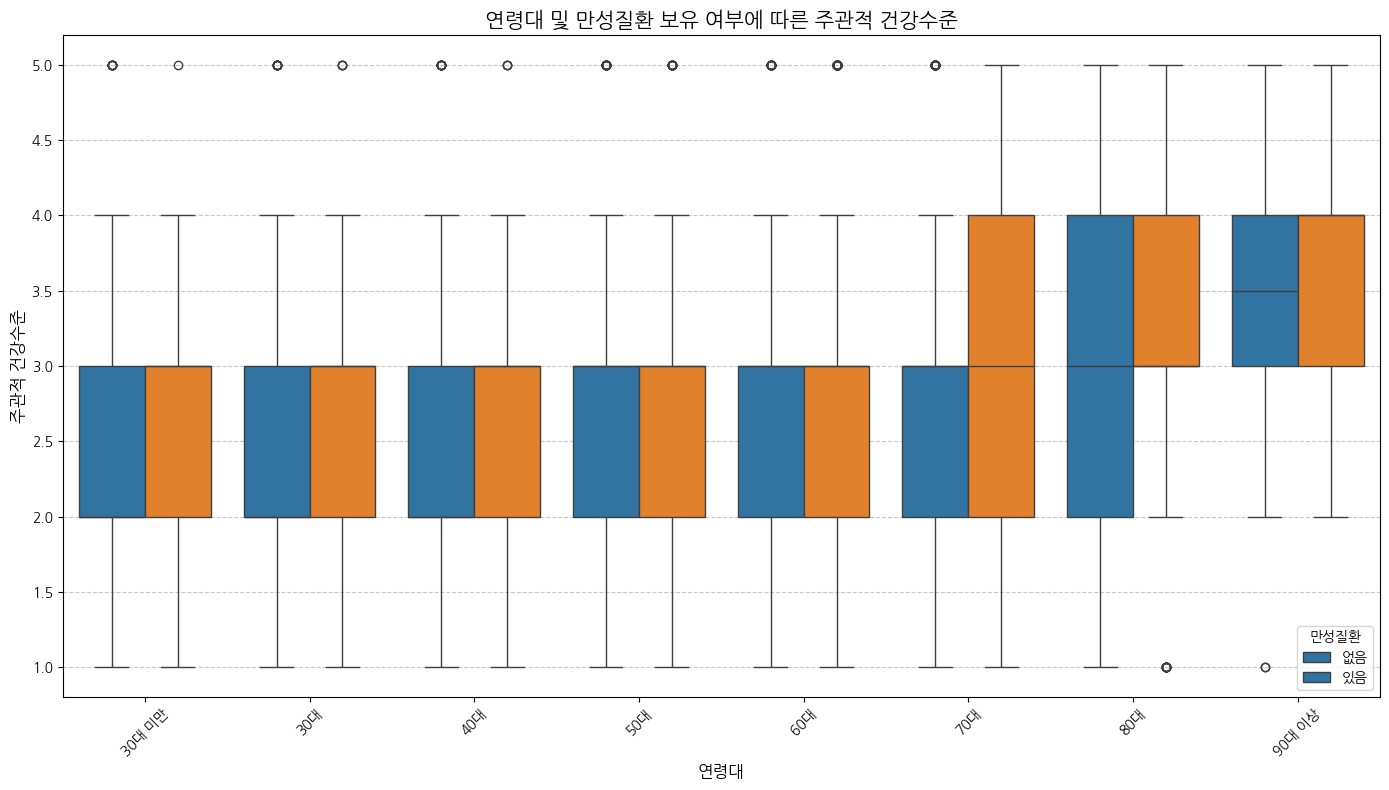

In [ ]:
# 4. 연령대와 만성질환 여부에 따른 주관적 건강수준 비교
# 연령대 구분 (30대 미만, 30대부터 80대까지 10세 단위, 90대 이상)
bins = [0, 30, 40, 50, 60, 70, 80, 90, 110]
labels = ['30대 미만', '30대', '40대', '50대', '60대', '70대', '80대', '90대 이상']
# Use the original 'age' column for cutting, not 'age2'
df['연령대'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


plt.figure(figsize=(14, 8))
# Use the existing 'age2' column for plotting as intended, which was created correctly earlier
sns.boxplot(x='age2', y='subjective_health', hue='has_chronic', data=df)
plt.title('연령대 및 만성질환 보유 여부에 따른 주관적 건강수준', fontsize=15)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('주관적 건강수준', fontsize=12)
plt.legend(title='만성질환', labels=['없음', '있음'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

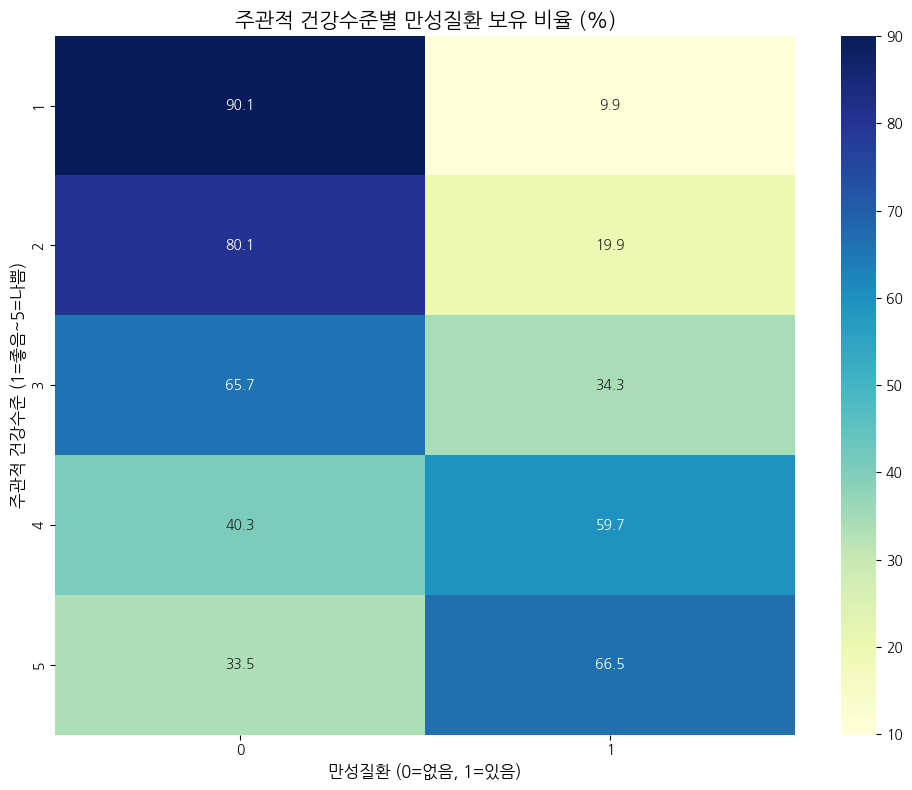

In [ ]:
# 5. 주관적 건강수준과 만성질환 여부의 교차표 분석
health_chronic_cross = pd.crosstab(df['subjective_health'], df['has_chronic'])
health_chronic_ratio = pd.crosstab(df['subjective_health'], df['has_chronic'], normalize='index') * 100

# 히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(health_chronic_ratio, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('주관적 건강수준별 만성질환 보유 비율 (%)', fontsize=15)
plt.xlabel('만성질환 (0=없음, 1=있음)', fontsize=12)
plt.ylabel('주관적 건강수준 (1=좋음~5=나쁨)', fontsize=12)
plt.tight_layout()
plt.show()


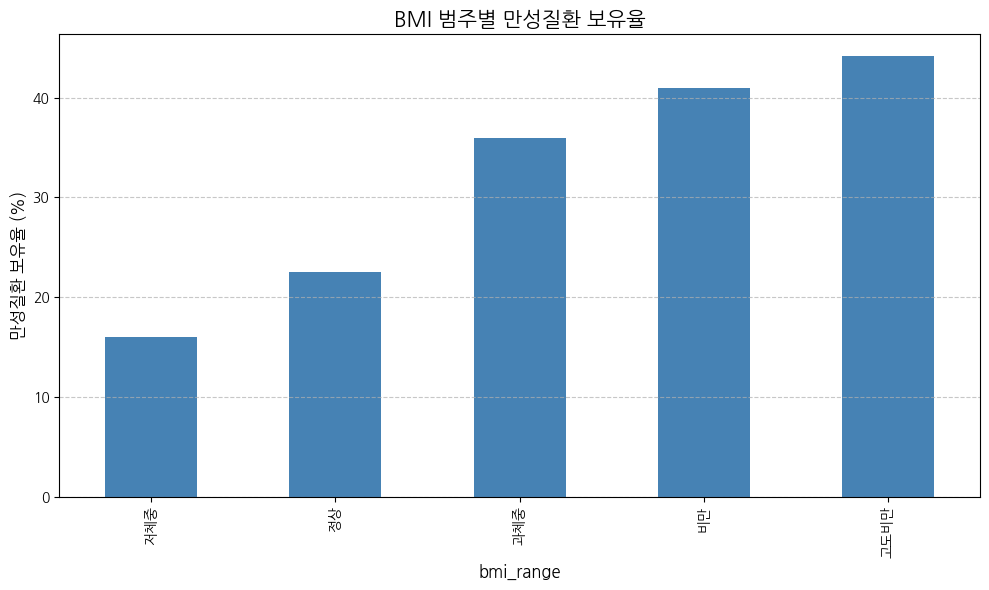

In [ ]:

# BMI 범주별 만성질환 보유율
bmi_chronic_ratio = pd.crosstab(df['bmi_range'], df['has_chronic'], normalize='index') * 100
plt.figure(figsize=(10, 6))
bmi_chronic_ratio[1].plot(kind='bar', color='steelblue')
plt.title('BMI 범주별 만성질환 보유율', fontsize=15)
plt.xlabel('bmi_range', fontsize=12)
plt.ylabel('만성질환 보유율 (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

df2 = pd.read_csv("data_1021_변수추가_결측치수정.csv",encoding='cp949')

df2

,age,gender,high_exercise,moderate_exercise,breakfast,height,weight,walk_days,sleep_hours,stress,...,social_difficulty_impairment,happy,sleep_quality,missed_medical_care,EQ5D_usual_act_score,EQ5D_pain_score,EQ5D_anxiety_depression,educate,economic_active,is_married
0,31,1,3,0,2,181.0,88.0,7,7.0,3,...,NaN,10.0,2.0,1,1,1,1.0,8.0,1,1
1,29,2,0,0,4,162.0,56.0,7,7.0,1,...,NaN,8.0,2.0,2,1,1,1.0,8.0,1,1
2,31,1,2,2,4,176.0,80.0,5,7.0,2,...,NaN,8.0,3.0,2,1,1,1.0,7.0,1,5
3,37,1,3,1,2,170.0,65.0,7,6.0,4,...,NaN,5.0,2.0,2,1,1,1.0,5.0,1,1
4,36,2,0,4,4,160.0,55.0,7,6.0,2,...,NaN,6.0,2.0,2,1,1,1.0,6.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22901,68,2,0,0,1,160.0,54.0,7,6.0,2,...,5.0,5.0,3.0,1,2,2,3.0,3.0,2,3
22902,64,1,0,0,1,150.0,56.0,7,5.0,2,...,5.0,4.0,3.0,2,1,1,2.0,4.0,2,1
22903,56,2,0,0,1,150.0,60.0,0,8.0,4,...,NaN,10.0,2.0,2,1,1,1.0,3.0,2,1
22904,54,1,0,3,1,177.0,89.0,5,6.0,2,...,NaN,7.0,2.0,2,1,1,1.0,8.0,1,1


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'NanumGothic.ttf'       # 설치한 폰트 경로
fm.fontManager.addfont(font_path)   # 폰트 경로 추가

plt.rcParams['font.family'] = 'NanumGothic' # 사용 폰트 입력
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 사용

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. 기본 통계 분석: 만성질환과 인지장애 변수들 간의 관계
# 교차표 생성
chronic_cognitive = pd.crosstab(df2['has_chronic'], df2['has_cognitive_impairment'])
print("만성질환과 인지장애 유무 교차표:")
print(chronic_cognitive)

# 비율 계산
chronic_cognitive_ratio = pd.crosstab(df2['has_chronic'], df2['has_cognitive_impairment'], normalize='index') * 100
print("\n만성질환 유무에 따른 인지장애 비율(%):")
print(chronic_cognitive_ratio)


만성질환과 인지장애 유무 교차표:
has_cognitive_impairment   1.0   2.0
has_chronic                         
0                         2102  7636
1                         2007  4854

만성질환 유무에 따른 인지장애 비율(%):
has_cognitive_impairment        1.0        2.0
has_chronic                                   
0                         21.585541  78.414459
1                         29.252296  70.747704


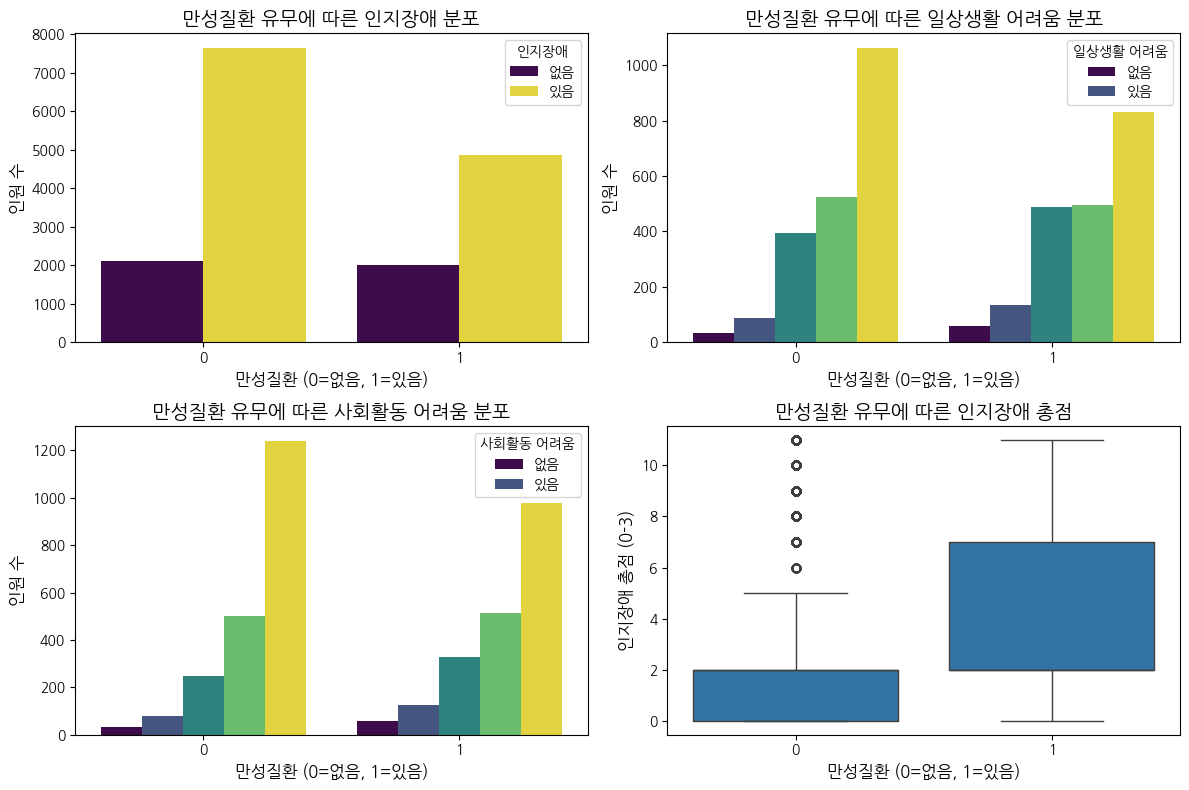

In [ ]:
# 2. 시각화: 만성질환 유무에 따른 인지장애 비율
plt.figure(figsize=(12, 8))

# 2.1 인지장애 유무
plt.subplot(2, 2, 1)
sns.countplot(x='has_chronic', hue='has_cognitive_impairment', data=df, palette='viridis')
plt.title('만성질환 유무에 따른 인지장애 분포', fontsize=14)
plt.xlabel('만성질환 (0=없음, 1=있음)', fontsize=12)
plt.ylabel('인원 수', fontsize=12)
plt.legend(title='인지장애', labels=['없음', '있음'])

# 2.2 일상생활 어려움
plt.subplot(2, 2, 2)
sns.countplot(x='has_chronic', hue='daily_difficulty_impairment', data=df, palette='viridis')
plt.title('만성질환 유무에 따른 일상생활 어려움 분포', fontsize=14)
plt.xlabel('만성질환 (0=없음, 1=있음)', fontsize=12)
plt.ylabel('인원 수', fontsize=12)
plt.legend(title='일상생활 어려움', labels=['없음', '있음'])

# 2.3 사회활동 어려움
plt.subplot(2, 2, 3)
sns.countplot(x='has_chronic', hue='social_difficulty_impairment', data=df, palette='viridis')
plt.title('만성질환 유무에 따른 사회활동 어려움 분포', fontsize=14)
plt.xlabel('만성질환 (0=없음, 1=있음)', fontsize=12)
plt.ylabel('인원 수', fontsize=12)
plt.legend(title='사회활동 어려움', labels=['없음', '있음'])

# 2.4 세 가지 인지장애 관련 변수의 합계 점수
# 합계 점수 계산 (각 변수가 0 또는 1이라고 가정)
df['cognitive_total_score'] = df['has_cognitive_impairment'].fillna(0) + \
                             df['daily_difficulty_impairment'].fillna(0) + \
                             df['social_difficulty_impairment'].fillna(0)

plt.subplot(2, 2, 4)
sns.boxplot(x='has_chronic', y='cognitive_total_score', data=df)
plt.title('만성질환 유무에 따른 인지장애 총점', fontsize=14)
plt.xlabel('만성질환 (0=없음, 1=있음)', fontsize=12)
plt.ylabel('인지장애 총점 (0-3)', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
# 1) 인지장애 경험 여부가 1인 사람
cog_exp_yes = df2[df2['has_cognitive_impairment'] == 1]
cog_exp_yes_chronic_rate = cog_exp_yes['has_chronic'].mean() * 100

print(f"인지장애 경험이 있는 사람들의 만성질환 보유율: {cog_exp_yes_chronic_rate:.2f}%")

# 2) 인지장애로 인한 일상생활 지장 정도가 1,2,3번인 사람
daily_impairment_severe = df2[df2['daily_difficulty_impairment'].isin([1, 2, 3])]
daily_impairment_chronic_rate = daily_impairment_severe['has_chronic'].mean() * 100

print(f"일상생활 지장 심한(1~3) 사람들의 만성질환 보유율: {daily_impairment_chronic_rate:.2f}%")

# 3) 인지장애로 인한 사회활동 지장 정도가 1,2,3번인 사람
social_impairment_severe = df[df['social_difficulty_impairment'].isin([1, 2, 3])]
social_impairment_chronic_rate = social_impairment_severe['has_chronic'].mean() * 100

print(f"사회활동 지장 심한(1~3) 사람들의 만성질환 보유율: {social_impairment_chronic_rate:.2f}%")

인지장애 경험이 있는 사람들의 만성질환 보유율: 48.84%
일상생활 지장 심한(1~3) 사람들의 만성질환 보유율: 56.95%
사회활동 지장 심한(1~3) 사람들의 만성질환 보유율: 58.88%


만성질환 유무에 따른 행복감 기술통계:
               count      mean       std  min  25%  50%  75%   max
has_chronic                                                       
0            15810.0  7.187603  1.684629  0.0  6.0  7.0  8.0  10.0
1             7092.0  6.813734  1.863746  0.0  5.0  7.0  8.0  10.0


/tmp/ipython-input-1594476674.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_chronic', y='happy', data=df, palette='Set2')


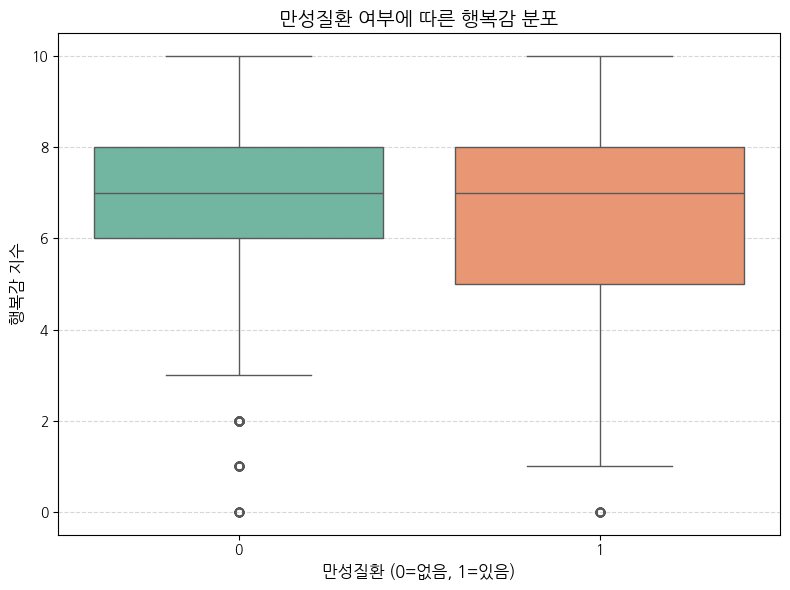

In [ ]:
# 1. 기술 통계량: 만성질환 보유 여부에 따른 행복감 평균
happy_by_chronic = df.groupby('has_chronic')['happy'].describe()
print("만성질환 유무에 따른 행복감 기술통계:")
print(happy_by_chronic)

# 2. 시각화

plt.figure(figsize=(8,6))
sns.boxplot(x='has_chronic', y='happy', data=df, palette='Set2')
plt.title('만성질환 여부에 따른 행복감 분포', fontsize=14)
plt.xlabel('만성질환 (0=없음, 1=있음)', fontsize=12)
plt.ylabel('행복감 지수', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# 3. 통계 검정 (독립표본 t-검정)
group0 = df[df['has_chronic'] == 0]['happy'].dropna()
group1 = df[df['has_chronic'] == 1]['happy'].dropna()

t_stat, p_val = stats.ttest_ind(group0, group1, equal_var=False)
print(f"독립표본 t-검정 결과: t = {t_stat:.4f}, p = {p_val:.4f}")

if p_val < 0.05:
    print("결론: 만성질환 보유 여부에 따라 행복감에 통계적으로 유의한 차이가 있습니다.")
else:
    print("결론: 만성질환 보유 여부에 따른 행복감 차이는 통계적으로 유의하지 않습니다.")


독립표본 t-검정 결과: t = 14.4515, p = 0.0000
결론: 만성질환 보유 여부에 따라 행복감에 통계적으로 유의한 차이가 있습니다.


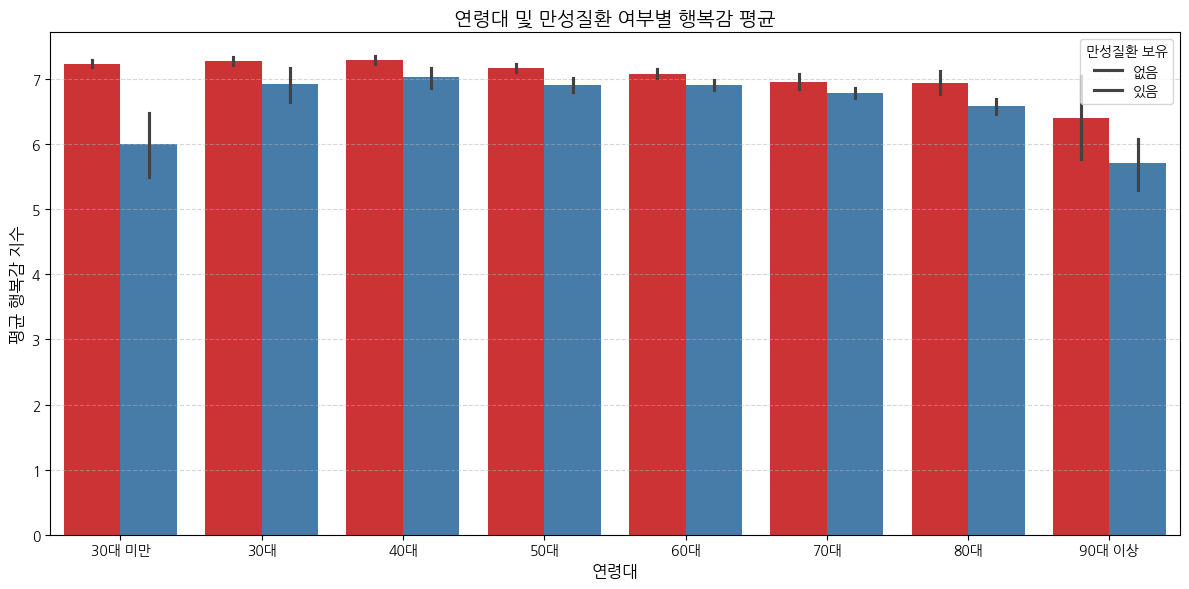

In [ ]:
# 4. (선택적) 연령대에 따른 행복감과 만성질환 교차 분석
# bins = [19, 30, 40, 50, 60, 70, 80, 101]
# labels = ['20대', '30대', '40대', '50대', '60대', '70대', '80대 이상']

# df['age'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

import numpy as np

plt.figure(figsize=(12, 6))
sns.barplot(x='age2', y='happy', hue='has_chronic', data=df, palette='Set1')
plt.title('연령대 및 만성질환 여부별 행복감 평균', fontsize=14)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('평균 행복감 지수', fontsize=12)
plt.legend(title='만성질환 보유', labels=['없음', '있음'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# 만성질환 여부와 경제활동 여부 간 교차표 생성
cross_tab = pd.crosstab(df['economic_active'], df['has_chronic'])
print("\n경제활동과 만성질환 보유 여부 교차표:")
print(cross_tab)


경제활동과 만성질환 보유 여부 교차표:
has_chronic          0     1
economic_active             
1                10594  3175
2                 5217  3920


In [ ]:
# 경제활동별 만성질환 보유 비율 계산 (%)
cross_prop = pd.crosstab(df['economic_active'], df['has_chronic'], normalize='index') * 100
print("\n경제활동별 만성질환 보유율(%):")
print(cross_prop)


경제활동별 만성질환 보유율(%):
has_chronic              0          1
economic_active                      
1                76.940954  23.059046
2                57.097516  42.902484


/tmp/ipython-input-64559379.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cross_prop.index.map({1:'경제활동', 2:'비경제활동'}), y=cross_prop[1], palette='Set2')


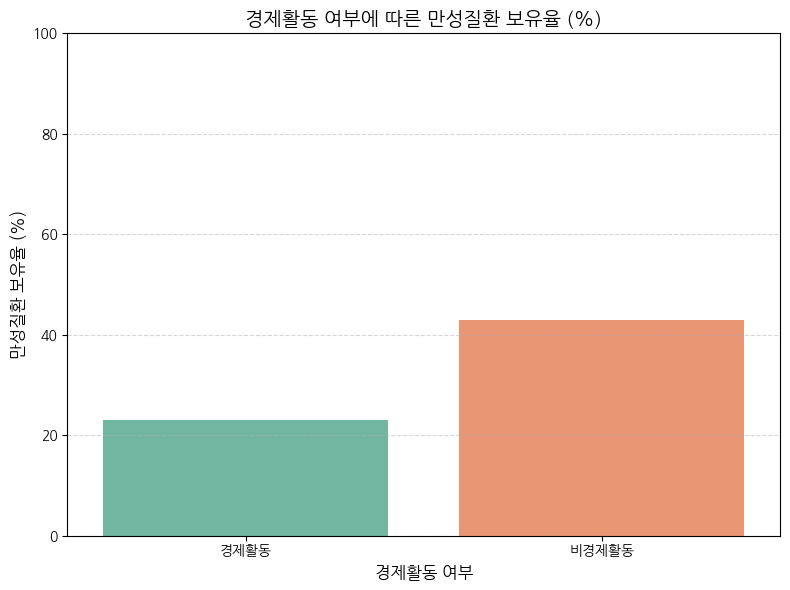

In [ ]:
# 시각화: 경제활동별 만성질환 보유율 바 차트
plt.figure(figsize=(8,6))
sns.barplot(x=cross_prop.index.map({1:'경제활동', 2:'비경제활동'}), y=cross_prop[1], palette='Set2')
plt.title('경제활동 여부에 따른 만성질환 보유율 (%)', fontsize=14)
plt.xlabel('경제활동 여부', fontsize=12)
plt.ylabel('만성질환 보유율 (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

df3 = pd.read_csv("data_1021_drink.csv",encoding='cp949')

df3

,age,gender,high_exercise,moderate_exercise,breakfast,height,weight,walk_days,sleep_hours,stress,...,missed_medical_care,EQ5D_usual_act_score,EQ5D_pain_score,EQ5D_anxiety_depression,educate,economic_active,is_married,smoking,drinking_freq,drink
0,31,1,3,0,2,181.0,88.0,7,7.0,3,...,1,1,1,1.0,8.0,1,1,NaN,4.0,1
1,29,2,0,0,4,162.0,56.0,7,7.0,1,...,2,1,1,1.0,8.0,1,1,NaN,4.0,1
2,31,1,2,2,4,176.0,80.0,5,7.0,2,...,2,1,1,1.0,7.0,1,5,3.0,5.0,1
3,37,1,3,1,2,170.0,65.0,7,6.0,4,...,2,1,1,1.0,5.0,1,1,1.0,4.0,1
4,36,2,0,4,4,160.0,55.0,7,6.0,2,...,2,1,1,1.0,6.0,1,1,3.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22901,68,2,0,0,1,160.0,54.0,7,6.0,2,...,1,2,2,3.0,3.0,2,3,NaN,2.0,1
22902,64,1,0,0,1,150.0,56.0,7,5.0,2,...,2,1,1,2.0,4.0,2,1,1.0,1.0,1
22903,56,2,0,0,1,150.0,60.0,0,8.0,4,...,2,1,1,1.0,3.0,2,1,NaN,NaN,2
22904,54,1,0,3,1,177.0,89.0,5,6.0,2,...,2,1,1,1.0,8.0,1,1,NaN,NaN,2


In [ ]:
# 1. drink 변수에서 7(응답거부) 제거
df_drink = df3[df3['drink'].isin([1, 2])].copy()
df_drink['drink'] = df_drink['drink'].map({1: '예', 2: '아니오'})

# 2. 교차표 및 비율 계산
cross_tab = pd.crosstab(df_drink['drink'], df_drink['has_chronic'])
print("평생 음주 여부와 만성질환 보유 교차표:")
print(cross_tab)

cross_prop = pd.crosstab(df_drink['drink'], df_drink['has_chronic'], normalize='index') * 100
print("\n평생 음주 여부별 만성질환 보유율(%):")
print(cross_prop)

평생 음주 여부와 만성질환 보유 교차표:
has_chronic      0     1
drink                   
아니오           1690  1408
예            14121  5687

평생 음주 여부별 만성질환 보유율(%):
has_chronic          0          1
drink                            
아니오          54.551323  45.448677
예            71.289378  28.710622


/tmp/ipython-input-3693594313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cross_prop.index, y=cross_prop[1], palette='Set1')


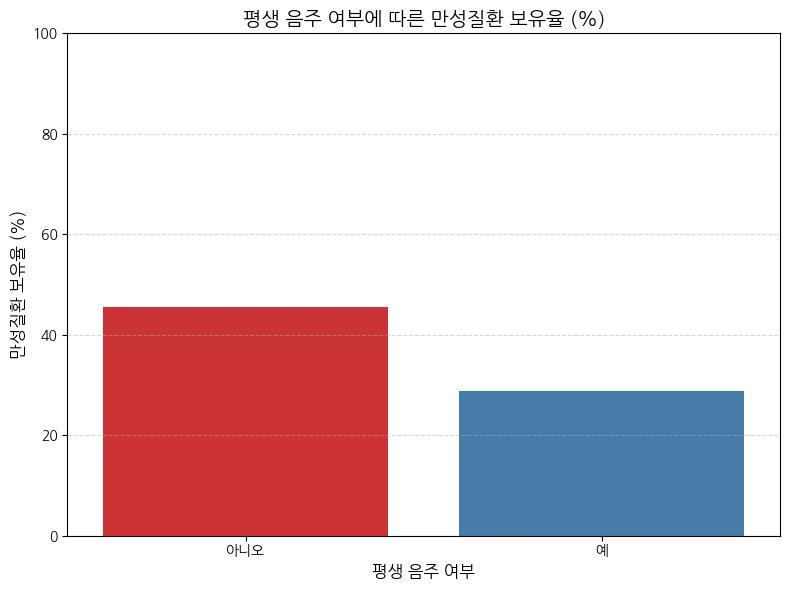

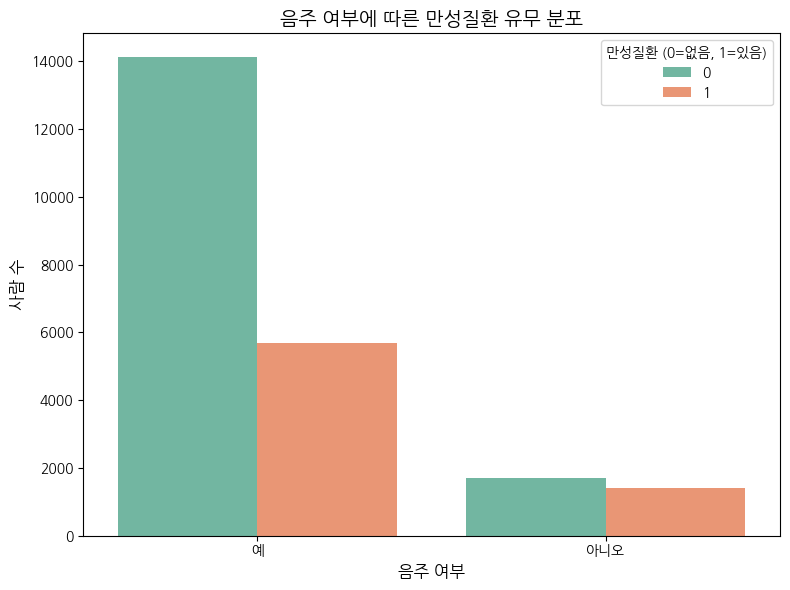

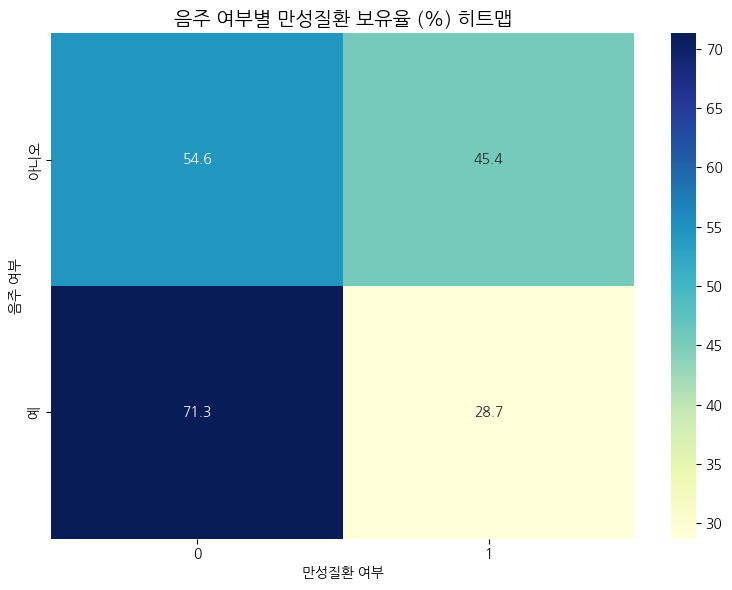

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=cross_prop.index, y=cross_prop[1], palette='Set1')
plt.title('평생 음주 여부에 따른 만성질환 보유율 (%)', fontsize=14)
plt.xlabel('평생 음주 여부', fontsize=12)
plt.ylabel('만성질환 보유율 (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x='drink', hue='has_chronic', data=df_drink, palette='Set2')
plt.title('음주 여부에 따른 만성질환 유무 분포', fontsize=14)
plt.xlabel('음주 여부', fontsize=12)
plt.ylabel('사람 수', fontsize=12)
plt.legend(title='만성질환 (0=없음, 1=있음)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(cross_prop, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('음주 여부별 만성질환 보유율 (%) 히트맵', fontsize=14)
plt.xlabel('만성질환 여부')
plt.ylabel('음주 여부')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3452066675.py:21: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3452066675.py:21: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3452066675.py:21: UserWarning: Glyph 51656 (\N{HANGUL SYLLABLE JIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3452066675.py:21: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3452066675.py:21: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3452066675.py:21: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3452066675.py:21: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout(

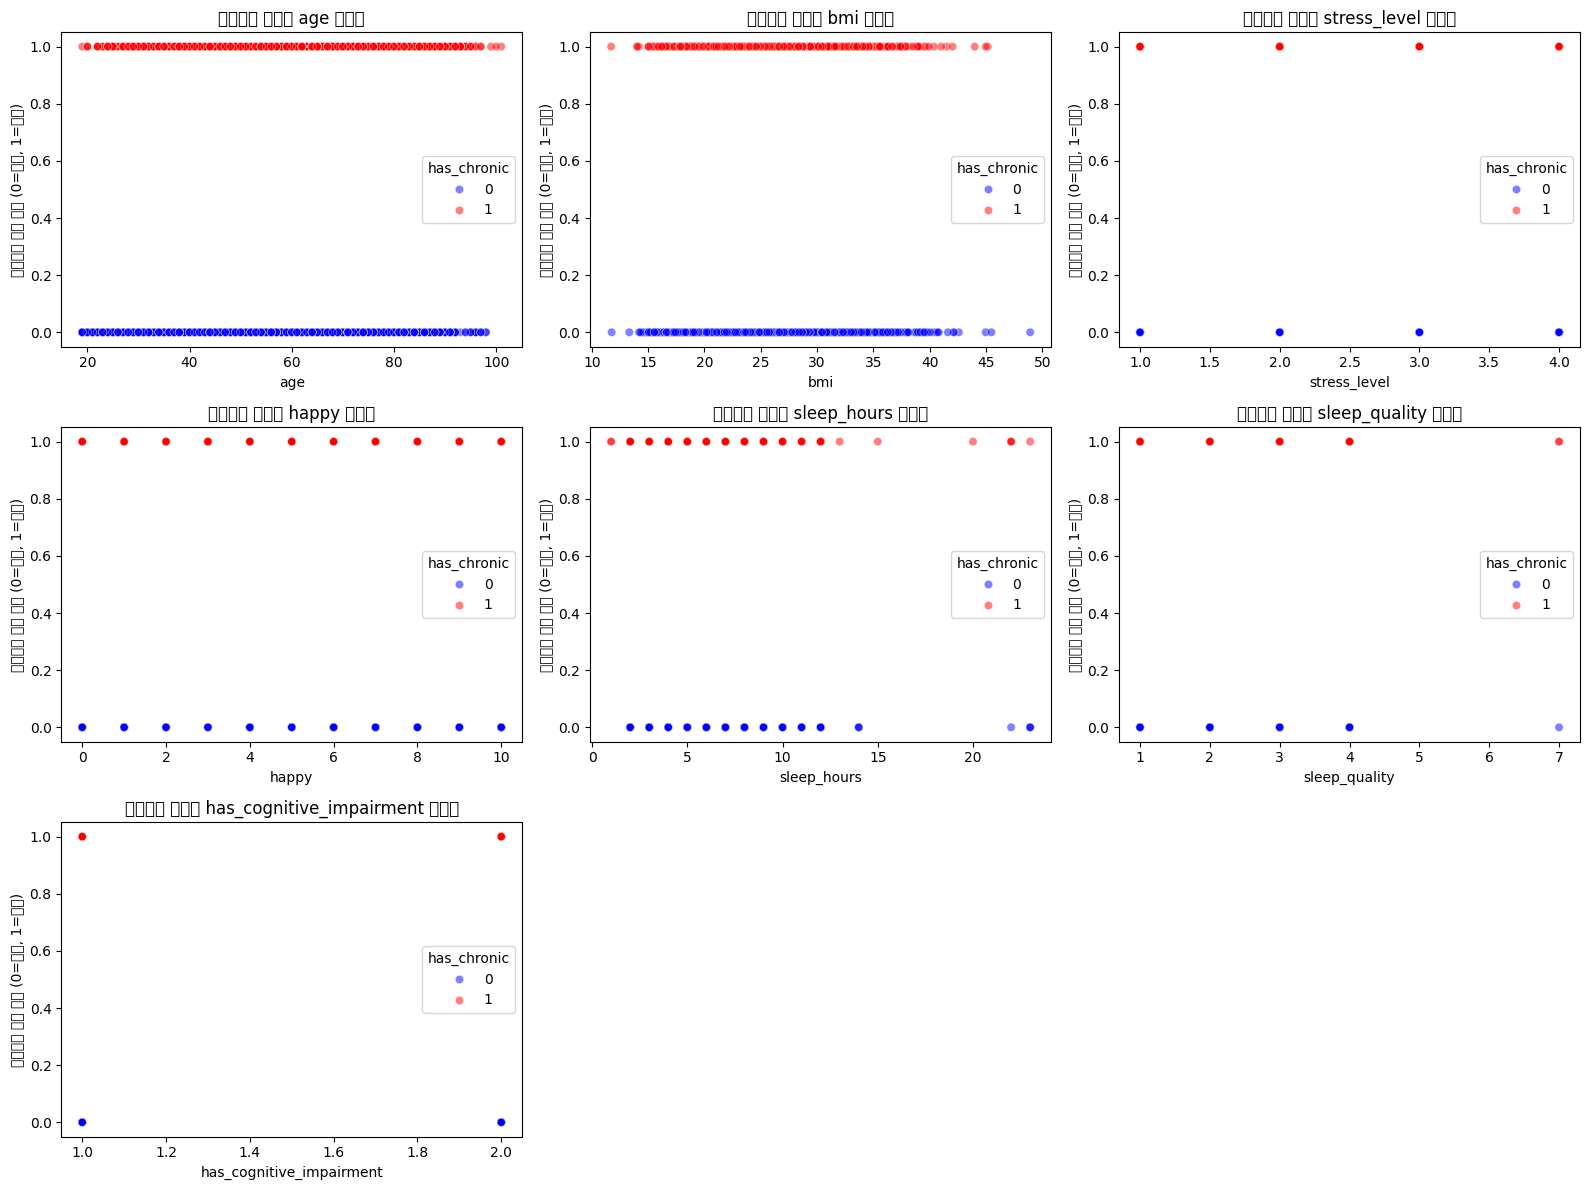

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 가정
df = pd.read_csv('data_1021_drink.csv')

# has_chronic과 산점도로 시각화할 변수 리스트
numeric_vars = ['age', 'bmi', 'stress_level', 'happy',
                'sleep_hours', 'sleep_quality', 'has_cognitive_impairment']

# 산점도 그리기: has_chronic 별 색 구분하여 비교
plt.figure(figsize=(16, 12))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=var, y='has_chronic', hue='has_chronic',
                    palette={0:'blue', 1:'red'}, alpha=0.5)
    plt.xlabel(var)
    plt.ylabel('만성질환 보유 여부 (0=없음, 1=있음)')
    plt.title(f'만성질환 여부와 {var} 산점도')
plt.tight_layout()
plt.show()

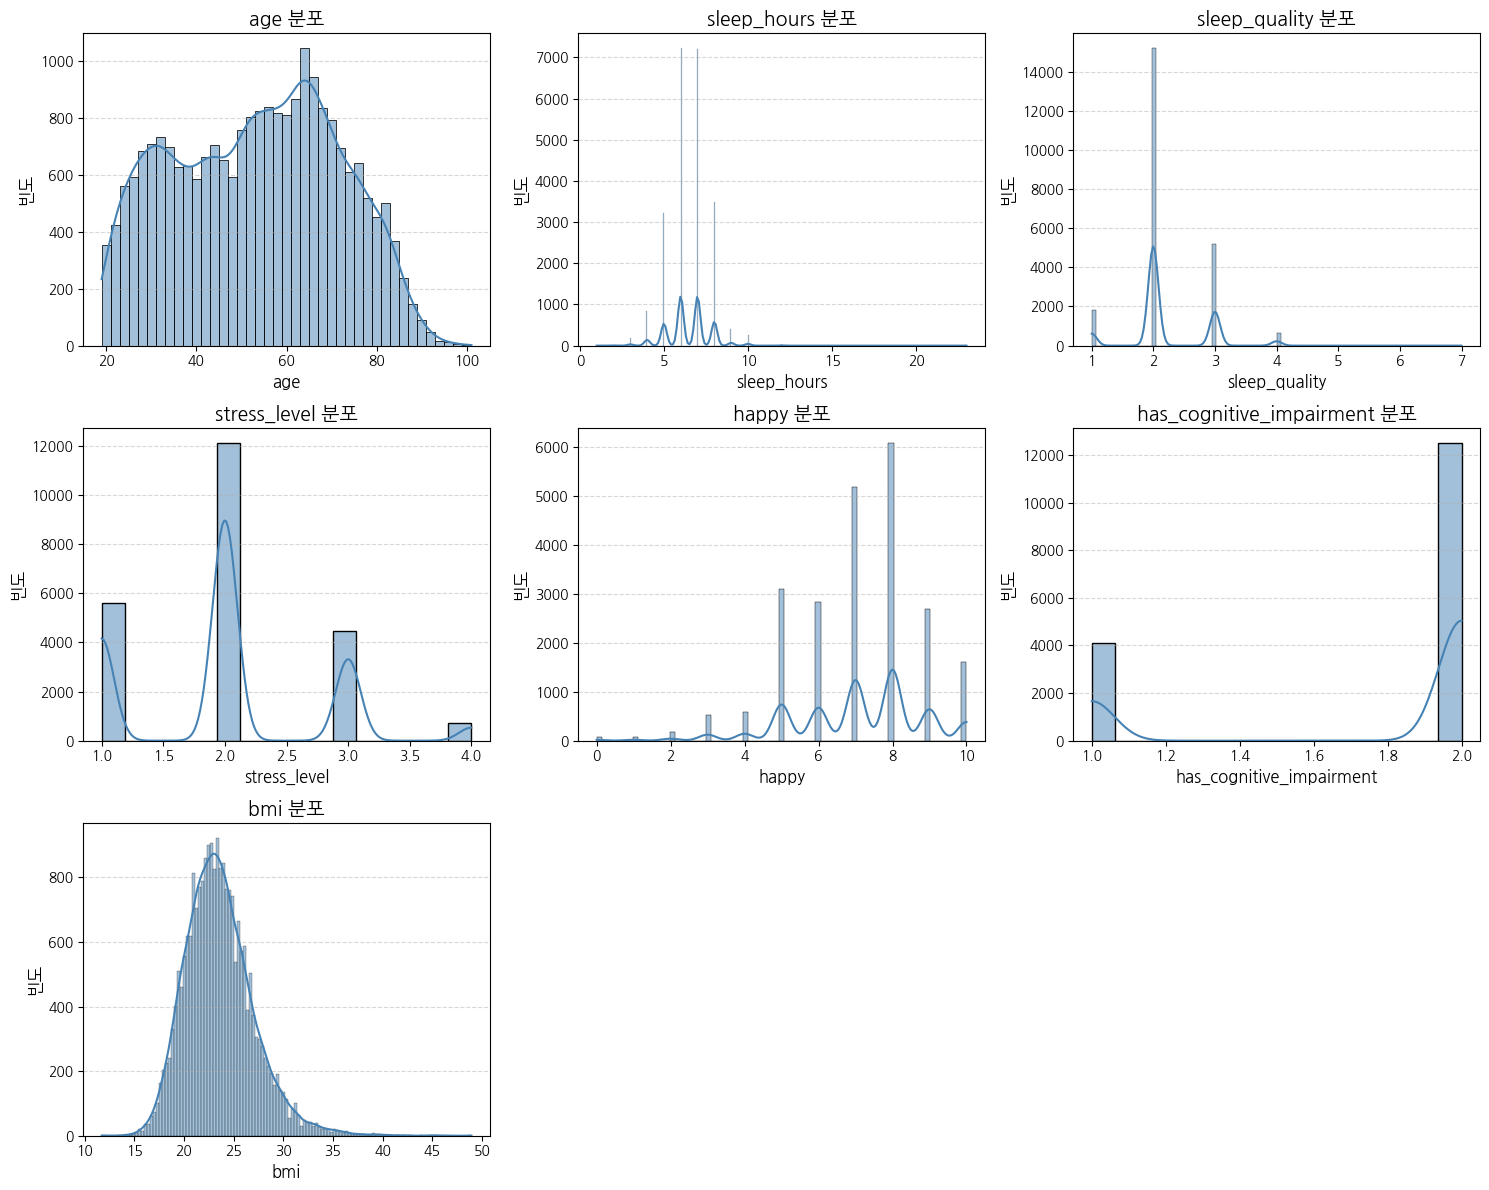

In [ ]:
import numpy as np

# 데이터 불러오기 (이미 로드되어 있다고 가정)
# df = pd.read_csv('data.csv')

# 한글 폰트 설정 (필요시)
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

# 1. 주요 변수들의 히스토그램 시각화
variables = ['age', 'sleep_hours', 'sleep_quality', 'stress_level',
             'happy', 'has_cognitive_impairment', 'bmi']

plt.figure(figsize=(15, 12))
for i, var in enumerate(variables, 1):
    # Changed subplot grid from 3x2 to 3x3 to fit all 7 variables
    plt.subplot(3, 3, i)
    sns.histplot(df[var].dropna(), kde=True, color='steelblue')
    plt.title(f'{var} 분포', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('빈도', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# # 2. 만성질환 보유 여부에 따른 주요 변수들의 히스토그램 비교
# plt.figure(figsize=(15, 12))
# for i, var in enumerate(variables, 1):
#     plt.subplot(3, 2, i)
#     sns.histplot(data=df, x=var, hue='has_chronic',
#                  multiple='stack', palette=['forestgreen', 'crimson'],
#                  kde=True, alpha=0.6)
#     plt.title(f'만성질환 여부에 따른 {var} 분포', fontsize=14)
#     plt.xlabel(var, fontsize=12)
#     plt.ylabel('빈도', fontsize=12)
#     plt.grid(axis='y', linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.show()

# # 3. 연령대별 히스토그램 (특히 중년층에 초점)
# # 연령대 구분
# bins = [0, 30, 40, 50, 60, 70, 80, 110]
# labels = ['30대 미만', '30대', '40대', '50대', '60대', '70대', '80대 이상']
# df['연령대'] = pd.cut(df['만나이'], bins=bins, labels=labels, right=False)

# plt.figure(figsize=(10, 6))
# sns.countplot(x='연령대', data=df, palette='viridis')
# plt.title('연령대별 분포', fontsize=15)
# plt.xlabel('연령대', fontsize=12)
# plt.ylabel('인원 수', fontsize=12)
# plt.grid(axis='y', linestyle='--', alpha=0.5)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# 4. BMI 분포 히스토그램 (필요시)
if 'BMI' not in df.columns:
    df['BMI'] = df['몸무게'] / ((df['키'] / 100) ** 2)

plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'].dropna(), kde=True, color='purple')
plt.title('BMI 분포', fontsize=15)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.axvline(x=18.5, color='red', linestyle='--', alpha=0.7)
plt.axvline(x=23, color='orange', linestyle='--', alpha=0.7)
plt.axvline(x=25, color='red', linestyle='--', alpha=0.7)
plt.axvline(x=30, color='darkred', linestyle='--', alpha=0.7)
plt.text(16.5, plt.ylim()[1]*0.9, '저체중', fontsize=10)
plt.text(20.5, plt.ylim()[1]*0.9, '정상', fontsize=10)
plt.text(24, plt.ylim()[1]*0.9, '과체중', fontsize=10)
plt.text(27.5, plt.ylim()[1]*0.9, '비만', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 6, not 7

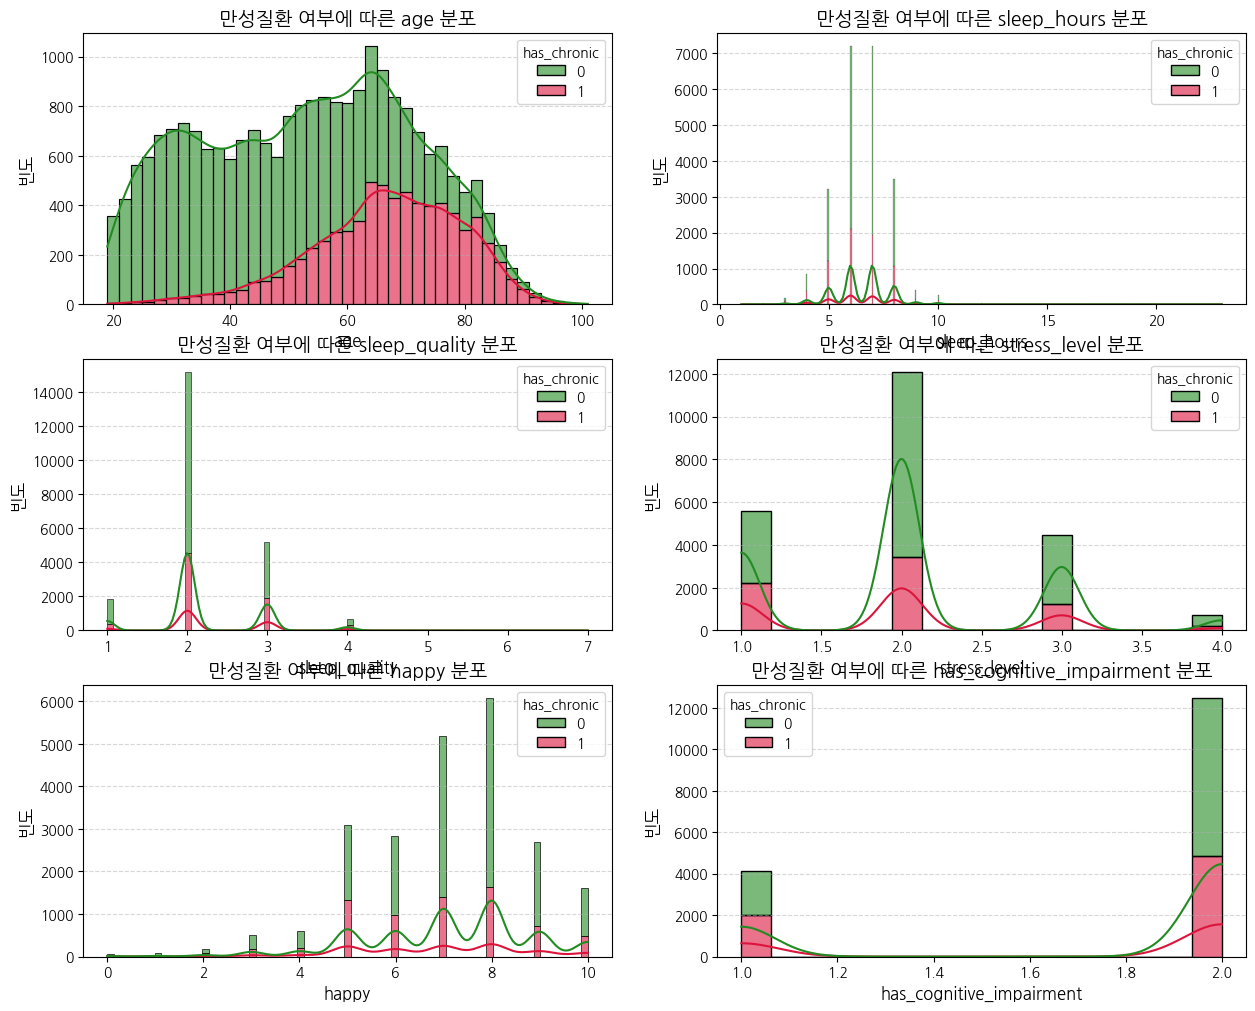

In [ ]:
# 2. 만성질환 보유 여부에 따른 주요 변수들의 히스토그램 비교
plt.figure(figsize=(15, 12))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=var, hue='has_chronic',
                 multiple='stack', palette=['forestgreen', 'crimson'],
                 kde=True, alpha=0.6)
    plt.title(f'만성질환 여부에 따른 {var} 분포', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('빈도', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-4216935870.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age', data=df, palette='viridis')


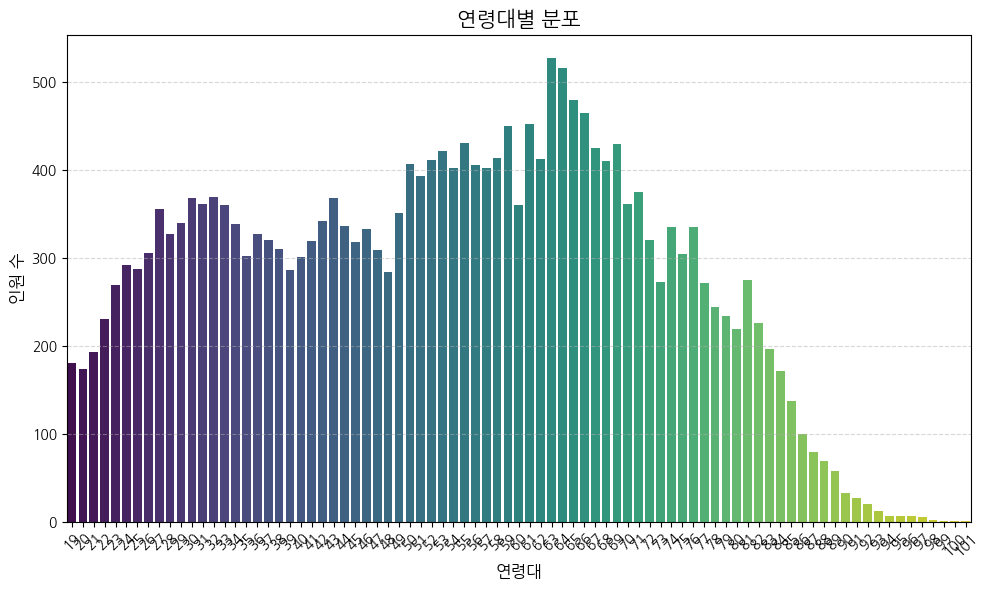

In [ ]:
# 3. 연령대별 히스토그램 (특히 중년층에 초점)
# 연령대 구분
bins = [0, 30, 40, 50, 60, 70, 80, 110]
labels = ['30대 미만', '30대', '40대', '50대', '60대', '70대', '80대 이상']
df['연령대'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=df, palette='viridis')
plt.title('연령대별 분포', fontsize=15)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('인원 수', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

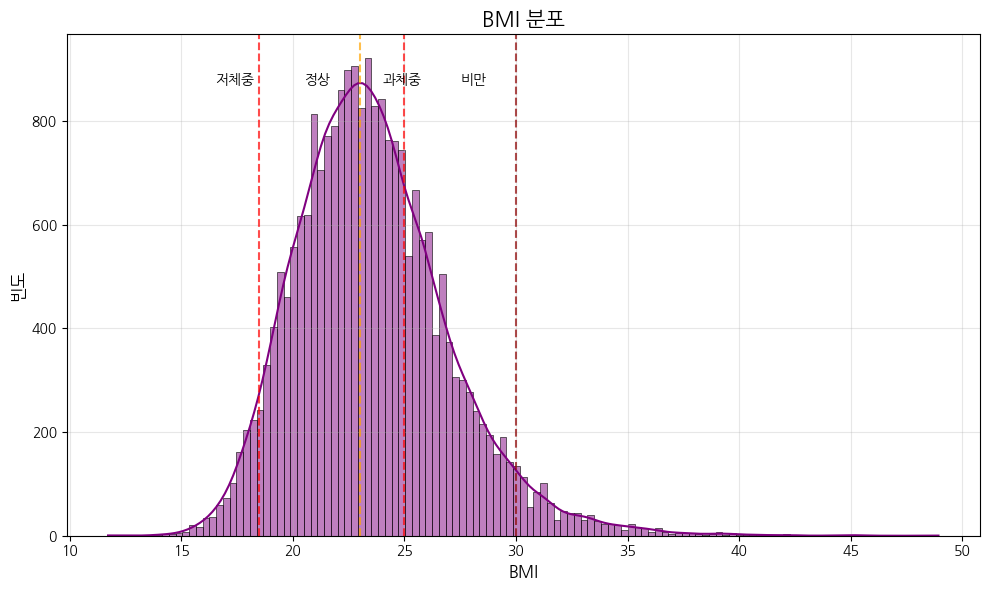

In [ ]:
# 4. BMI 분포 히스토그램 (필요시)

plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'].dropna(), kde=True, color='purple')
plt.title('BMI 분포', fontsize=15)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.axvline(x=18.5, color='red', linestyle='--', alpha=0.7)
plt.axvline(x=23, color='orange', linestyle='--', alpha=0.7)
plt.axvline(x=25, color='red', linestyle='--', alpha=0.7)
plt.axvline(x=30, color='darkred', linestyle='--', alpha=0.7)
plt.text(16.5, plt.ylim()[1]*0.9, '저체중', fontsize=10)
plt.text(20.5, plt.ylim()[1]*0.9, '정상', fontsize=10)
plt.text(24, plt.ylim()[1]*0.9, '과체중', fontsize=10)
plt.text(27.5, plt.ylim()[1]*0.9, '비만', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3713563827.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_prevalence = df.groupby('연령대')['has_chronic'].mean().reset_index()
/tmp/ipython-input-3713563827.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='연령대', y='만성질환_보유율_percent', data=df_prevalence, palette='YlGnBu')


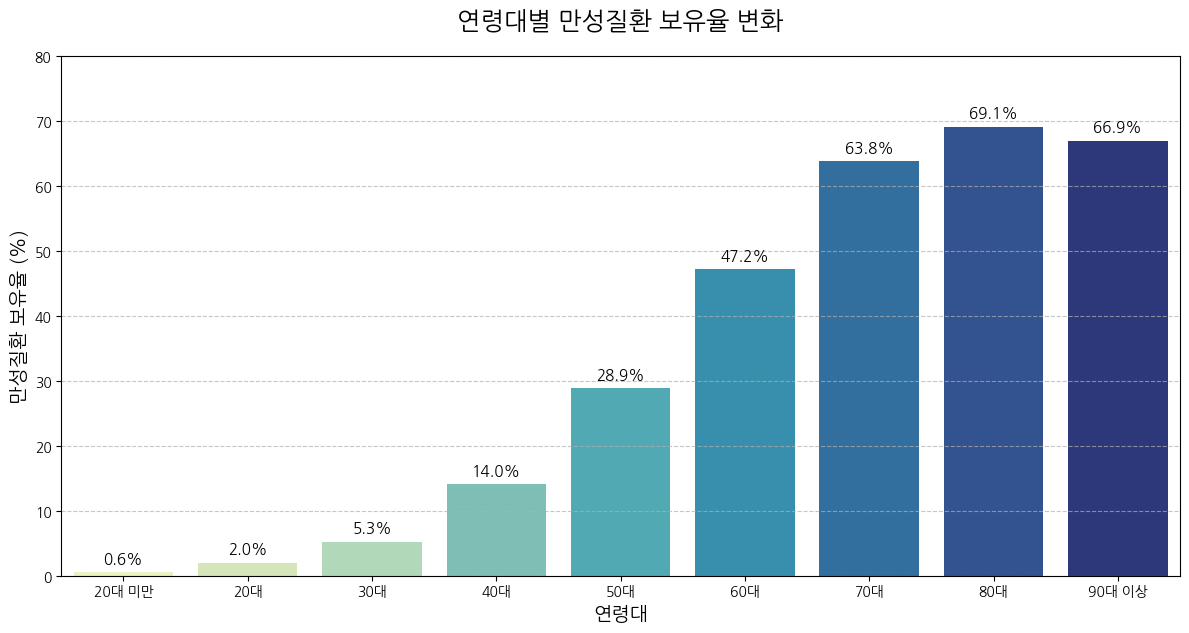

In [ ]:
# 2. 연령대 구분
# 30대 미만(0~29), 30대(30~39), ..., 80대(80~89), 90대 이상(90~)
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 150] # 넉넉하게 150까지 설정
labels = ['20대 미만', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대 이상']
df['연령대'] = pd.cut(df['age'], bins=bins, labels=labels, right=False, ordered=True)

# 3. 각 연령대별 만성질환 보유율 계산
# has_chronic이 0(없음), 1(있음)으로 되어있으면 평균값이 곧 보유율이 됩니다.
df_prevalence = df.groupby('연령대')['has_chronic'].mean().reset_index()
df_prevalence['만성질환_보유율_percent'] = df_prevalence['has_chronic'] * 100

# 4. 그래프 생성 및 수치 표시
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='연령대', y='만성질환_보유율_percent', data=df_prevalence, palette='YlGnBu')

# 그래프 제목과 축 레이블 설정
plt.title('연령대별 만성질환 보유율 변화', fontsize=18, pad=20)
plt.xlabel('연령대', fontsize=14)
plt.ylabel('만성질환 보유율 (%)', fontsize=14)
plt.ylim(0, 80) # Y축 범위 조정: 0부터 최대 보유율보다 약간 높게

# 각 막대 위에 만성질환 보유율 숫자 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', # 소수점 첫째자리까지 표시
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10), # 텍스트 위치 조정을 위한 오프셋 (막대 위로 10포인트)
                textcoords = 'offset points',
                fontsize=11,
                color='black')



plt.grid(axis='y', linestyle='--', alpha=0.7) # Y축 그리드 라인 추가
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 전체 제목을 고려하여 레이아웃 조정
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv("data_1021_drink.csv",encoding='cp949')

df

,age,gender,high_exercise,moderate_exercise,breakfast,height,weight,walk_days,sleep_hours,stress,...,missed_medical_care,EQ5D_usual_act_score,EQ5D_pain_score,EQ5D_anxiety_depression,educate,economic_active,is_married,smoking,drinking_freq,drink
0,31,1,3,0,2,181.0,88.0,7,7.0,3,...,1,1,1,1.0,8.0,1,1,NaN,4.0,1
1,29,2,0,0,4,162.0,56.0,7,7.0,1,...,2,1,1,1.0,8.0,1,1,NaN,4.0,1
2,31,1,2,2,4,176.0,80.0,5,7.0,2,...,2,1,1,1.0,7.0,1,5,3.0,5.0,1
3,37,1,3,1,2,170.0,65.0,7,6.0,4,...,2,1,1,1.0,5.0,1,1,1.0,4.0,1
4,36,2,0,4,4,160.0,55.0,7,6.0,2,...,2,1,1,1.0,6.0,1,1,3.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22901,68,2,0,0,1,160.0,54.0,7,6.0,2,...,1,2,2,3.0,3.0,2,3,NaN,2.0,1
22902,64,1,0,0,1,150.0,56.0,7,5.0,2,...,2,1,1,2.0,4.0,2,1,1.0,1.0,1
22903,56,2,0,0,1,150.0,60.0,0,8.0,4,...,2,1,1,1.0,3.0,2,1,NaN,NaN,2
22904,54,1,0,3,1,177.0,89.0,5,6.0,2,...,2,1,1,1.0,8.0,1,1,NaN,NaN,2


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'NanumGothic.ttf'       # 설치한 폰트 경로
fm.fontManager.addfont(font_path)   # 폰트 경로 추가

plt.rcParams['font.family'] = 'NanumGothic' # 사용 폰트 입력
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 사용

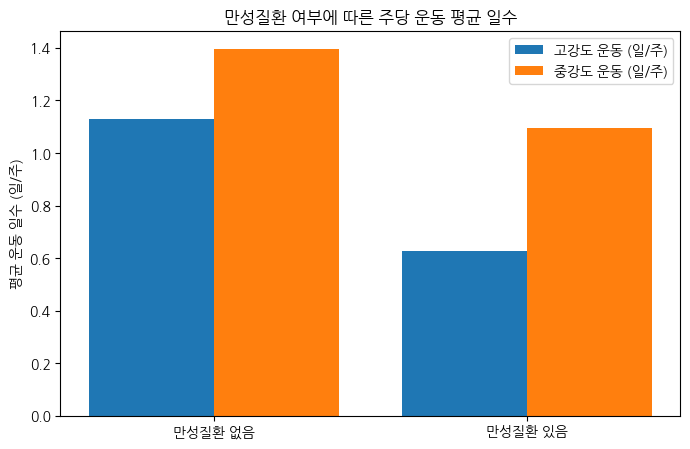

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 그룹별 평균 계산
grouped = df.groupby('has_chronic')[['high_exercise', 'moderate_exercise']].mean().reset_index()

# 막대그래프 그리기
labels = ['만성질환 없음', '만성질환 있음']
x = range(len(labels))

plt.figure(figsize=(8,5))
plt.bar(x, grouped['high_exercise'], width=0.4, label='고강도 운동 (일/주)', align='center')
plt.bar([i + 0.4 for i in x], grouped['moderate_exercise'], width=0.4, label='중강도 운동 (일/주)', align='center')

plt.xticks([i + 0.2 for i in x], labels)
plt.ylabel('평균 운동 일수 (일/주)')
plt.title('만성질환 여부에 따른 주당 운동 평균 일수')
plt.legend()
plt.show()

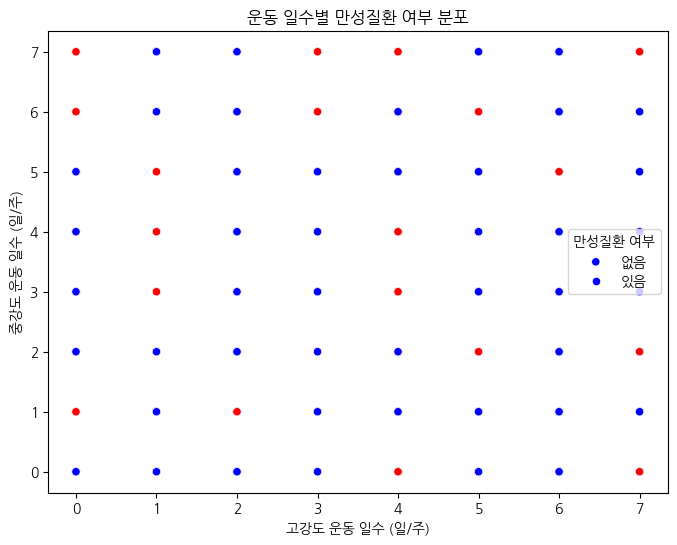

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.figure(figsize=(8,6))
sns.scatterplot(x='high_exercise', y='moderate_exercise', hue='has_chronic', data=df, palette={0:'blue', 1:'red'})
plt.xlabel('고강도 운동 일수 (일/주)')
plt.ylabel('중강도 운동 일수 (일/주)')
plt.title('운동 일수별 만성질환 여부 분포')
plt.legend(title='만성질환 여부', labels=['없음', '있음'])
plt.show()

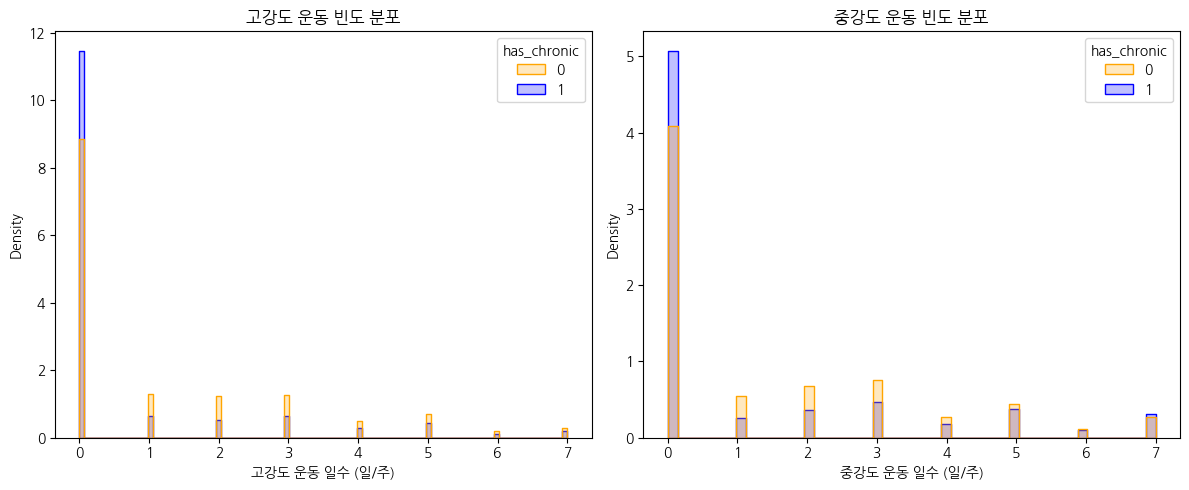

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(data=df, x='high_exercise', hue='has_chronic', element='step', stat='density', common_norm=False, palette={0:'orange', 1:'blue'})
plt.title('고강도 운동 빈도 분포')
plt.xlabel('고강도 운동 일수 (일/주)')

plt.subplot(1,2,2)
sns.histplot(data=df, x='moderate_exercise', hue='has_chronic', element='step', stat='density', common_norm=False, palette={0:'orange', 1:'blue'})
plt.title('중강도 운동 빈도 분포')
plt.xlabel('중강도 운동 일수 (일/주)')

plt.tight_layout()
plt.show()

/tmp/ipython-input-1476657316.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq = data.groupby(['has_chronic', column]).size().unstack(fill_value=0)
/tmp/ipython-input-1476657316.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq = data.groupby(['has_chronic', column]).size().unstack(fill_value=0)


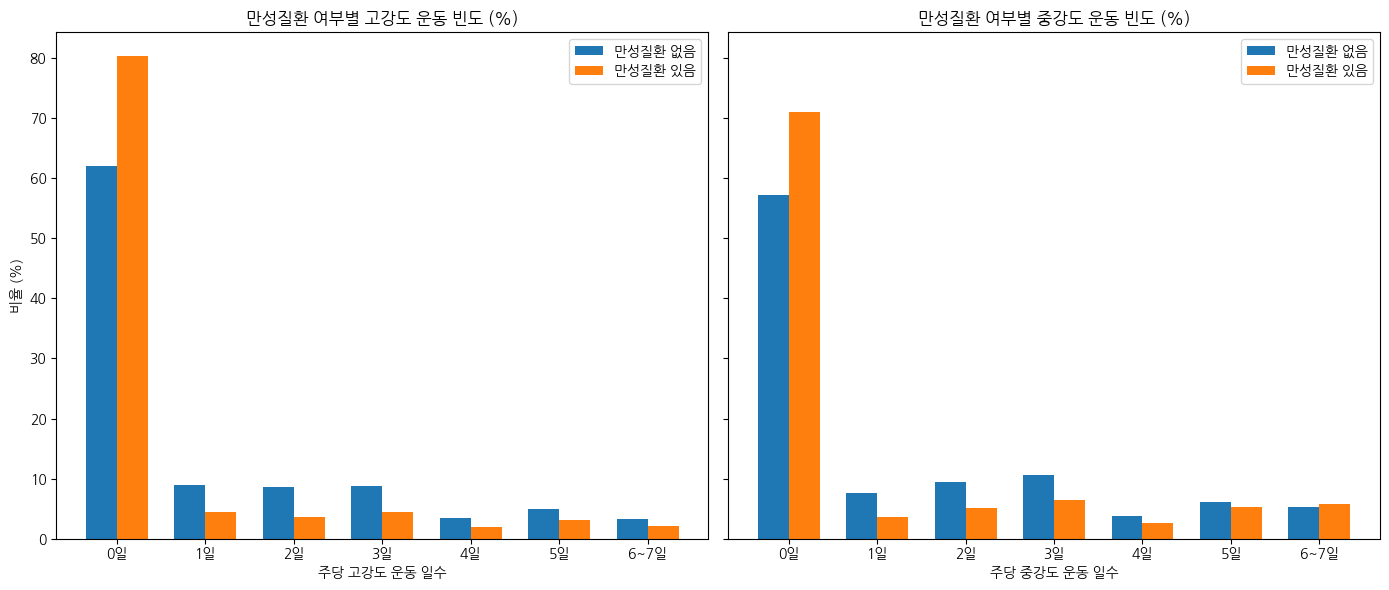

In [ ]:
bins = [-0.1, 0, 1, 2, 3, 4, 5, 7]  # 0, 1~7일 기준
labels = ['0일', '1일', '2일', '3일', '4일', '5일', '6~7일']

df['high_bin'] = pd.cut(df['high_exercise'], bins=bins, labels=labels)
df['moderate_bin'] = pd.cut(df['moderate_exercise'], bins=bins, labels=labels)

# 만성질환 여부별로 빈도 계산 함수
def calc_relative_freq(data, column):
    freq = data.groupby(['has_chronic', column]).size().unstack(fill_value=0)
    rel_freq = freq.div(freq.sum(axis=1), axis=0) * 100  # %로 변환
    return rel_freq

high_freq = calc_relative_freq(df, 'high_bin')
mod_freq = calc_relative_freq(df, 'moderate_bin')

# 그래프 그리기
bar_width = 0.35
x = np.arange(len(labels))

fig, axs = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# 고강도 운동
axs[0].bar(x - bar_width/2, high_freq.loc[0], width=bar_width, label='만성질환 없음')
axs[0].bar(x + bar_width/2, high_freq.loc[1], width=bar_width, label='만성질환 있음')
axs[0].set_title('만성질환 여부별 고강도 운동 빈도 (%)')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].set_xlabel('주당 고강도 운동 일수')
axs[0].set_ylabel('비율 (%)')
axs[0].legend()

# 중강도 운동
axs[1].bar(x - bar_width/2, mod_freq.loc[0], width=bar_width, label='만성질환 없음')
axs[1].bar(x + bar_width/2, mod_freq.loc[1], width=bar_width, label='만성질환 있음')
axs[1].set_title('만성질환 여부별 중강도 운동 빈도 (%)')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
axs[1].set_xlabel('주당 중강도 운동 일수')
axs[1].legend()

plt.tight_layout()
plt.show()

/tmp/ipython-input-1028764697.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq = data.groupby(['has_chronic', column]).size().unstack(fill_value=0)
/tmp/ipython-input-1028764697.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq = data.groupby(['has_chronic', column]).size().unstack(fill_value=0)


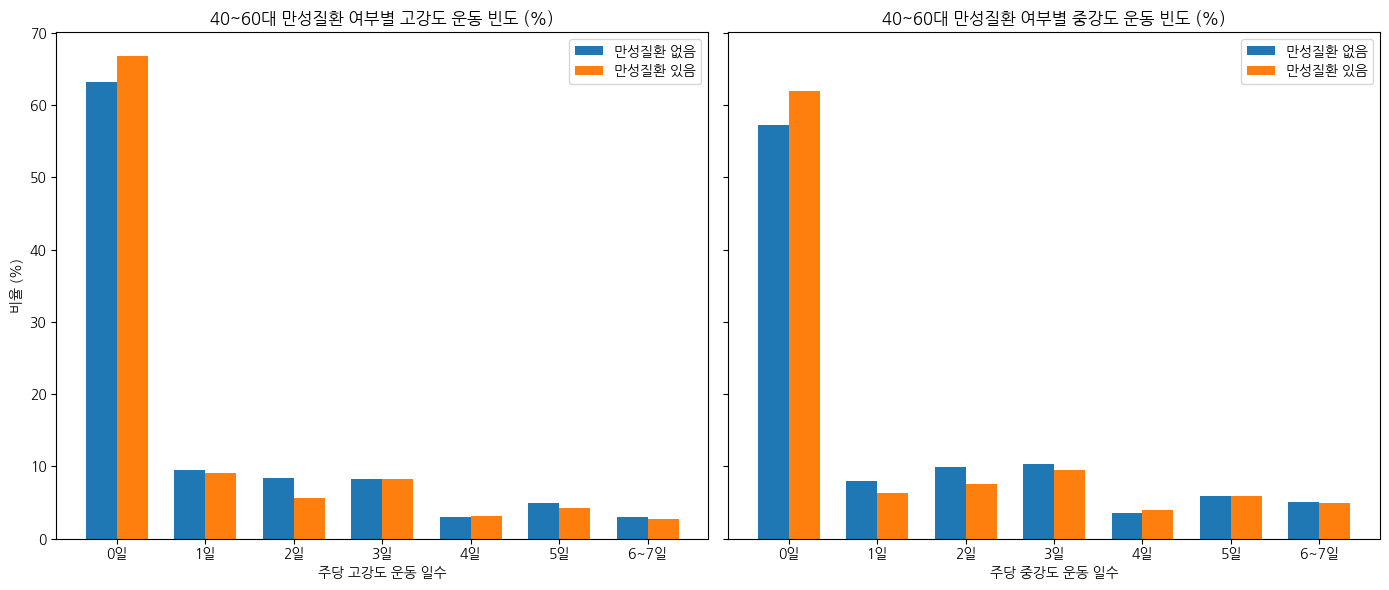

In [ ]:
# 1. 40대부터 60대까지 데이터만 필터링
age_filtered = df[(df['age'] >= 40) & (df['age'] <= 60)].copy()

# 2. 운동 일수 범주 설정 (예시)
bins = [-0.1, 0, 1, 2, 3, 4, 5, 7]
labels = ['0일', '1일', '2일', '3일', '4일', '5일', '6~7일']

age_filtered['high_exercise_bin'] = pd.cut(age_filtered['high_exercise'], bins=bins, labels=labels)
age_filtered['moderate_exercise_bin'] = pd.cut(age_filtered['moderate_exercise'], bins=bins, labels=labels)

# 3. 그룹별 상대 빈도 계산 함수
def calc_relative_freq(data, column):
    freq = data.groupby(['has_chronic', column]).size().unstack(fill_value=0)
    rel_freq = freq.div(freq.sum(axis=1), axis=0) * 100
    return rel_freq

high_freq = calc_relative_freq(age_filtered, 'high_bin')
mod_freq = calc_relative_freq(age_filtered, 'moderate_bin')

# 4. 나란히 막대 그래프 그리기
bar_width = 0.35
x = np.arange(len(labels))

fig, axs = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# 고강도 운동
axs[0].bar(x - bar_width/2, high_freq.loc[0], width=bar_width, label='만성질환 없음')
axs[0].bar(x + bar_width/2, high_freq.loc[1], width=bar_width, label='만성질환 있음')
axs[0].set_title('40~60대 만성질환 여부별 고강도 운동 빈도 (%)')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].set_xlabel('주당 고강도 운동 일수')
axs[0].set_ylabel('비율 (%)')
axs[0].legend()

# 중강도 운동
axs[1].bar(x - bar_width/2, mod_freq.loc[0], width=bar_width, label='만성질환 없음')
axs[1].bar(x + bar_width/2, mod_freq.loc[1], width=bar_width, label='만성질환 있음')
axs[1].set_title('40~60대 만성질환 여부별 중강도 운동 빈도 (%)')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
axs[1].set_xlabel('주당 중강도 운동 일수')
axs[1].legend()

plt.tight_layout()
plt.show()

/tmp/ipython-input-2508277654.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq = data.groupby(['has_chronic', column]).size().unstack(fill_value=0)
/tmp/ipython-input-2508277654.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq = data.groupby(['has_chronic', column]).size().unstack(fill_value=0)


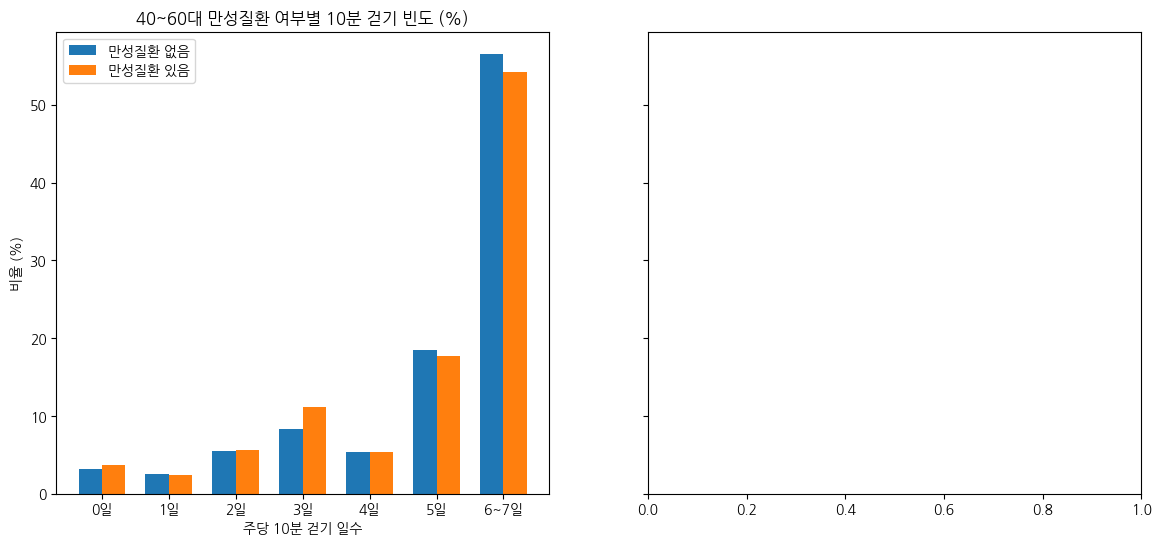

In [ ]:
# 1. 40대부터 60대까지 데이터만 필터링
age_filtered = df[(df['age'] >= 40) & (df['age'] <= 60)].copy()

# 2. 운동 일수 범주 설정 (예시)
bins = [-0.1, 0, 1, 2, 3, 4, 5, 7]
labels = ['0일', '1일', '2일', '3일', '4일', '5일', '6~7일']

age_filtered['walk_days_bin'] = pd.cut(age_filtered['walk_days'], bins=bins, labels=labels)

# 3. 그룹별 상대 빈도 계산 함수
def calc_relative_freq(data, column):
    freq = data.groupby(['has_chronic', column]).size().unstack(fill_value=0)
    rel_freq = freq.div(freq.sum(axis=1), axis=0) * 100
    return rel_freq

high_freq = calc_relative_freq(age_filtered, 'walk_days_bin')
mod_freq = calc_relative_freq(age_filtered, 'walk_days_bin')

# 4. 나란히 막대 그래프 그리기
bar_width = 0.35
x = np.arange(len(labels))

fig, axs = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# 고강도 운동
axs[0].bar(x - bar_width/2, high_freq.loc[0], width=bar_width, label='만성질환 없음')
axs[0].bar(x + bar_width/2, high_freq.loc[1], width=bar_width, label='만성질환 있음')
axs[0].set_title('40~60대 만성질환 여부별 10분 걷기 빈도 (%)')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].set_xlabel('주당 10분 걷기 일수')
axs[0].set_ylabel('비율 (%)')
axs[0].legend()

# # 중강도 운동
# axs[1].bar(x - bar_width/2, mod_freq.loc[0], width=bar_width, label='만성질환 없음')
# axs[1].bar(x + bar_width/2, mod_freq.loc[1], width=bar_width, label='만성질환 있음')
# axs[1].set_title('40~60대 만성질환 여부별 중강도 운동 빈도 (%)')
# axs[1].set_xticks(x)
# axs[1].set_xticklabels(labels)
# axs[1].set_xlabel('주당 중강도 운동 일수')
# axs[1].legend()

# plt.tight_layout()
# plt.show()